# Water For all - Model to classify the Water Potability - Mimi

In [190]:
# Import Libraries
#System
import os 

#Warnings
import warnings
warnings.filterwarnings('ignore')

#Data Transformation and Modelling
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import datetime as dt
import time

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import scatter_matrix
import seaborn as sns
from IPython.display import set_matplotlib_formats, HTML
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import colors as mcolors
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
%matplotlib inline
%config InlineBackend.figure_format = 'png'
from sklearn.tree import DecisionTreeClassifier


### Standarizing Visualizations

In [191]:
# default plotting styles - Use This Function
def set_sns_format(width=14, height=8):
    sns.set_theme(palette='pastel', context='notebook',rc={'savefig.dpi':300})
    set_matplotlib_formats('retina')
    matplotlib.rcParams['figure.figsize'] = (width, height)
    return None 
set_sns_format(width=14, height=8)

## Business Understanding


* Company occupation

Water For All is a world wide Laboratory specialized in water quality analysis.

Water For wants to create a hand device to analyze the potability of water.  

* Business Problem

Water For All has contacted his Data Scientist Department to create a model which will be deployed in all his Hand Devices to Check the Water Potability. 

Water For All has created a sensor for every feature on the Dataset. 


#### About Dataset

* Context

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

* Content

The water_potability.csv file contains water quality metrics for 3276 different water bodies.

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

## Data Mining

In [229]:
## Read the Dataset

df = pd.read_csv("./dataset/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


#### Short understanding of the Dataset

In [193]:
# hape
df.shape

(3276, 10)

In [194]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [195]:
#Columns
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [196]:
#Missing values
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## Data Cleaning

#

Data for pH, sulfate, and trihalomethanes are not full. Ideally we want to replace or remove the missing values.
What should be used to make up for the missing numbers is the question. 
For now it will be assumed to be the mean of the classification unless a relationship can be observed.

# pH

In [197]:
# Checking number of rows and columns 
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

# Checking percentage of null values
print("*****Percentage of Null Values*****")
print(round(df.isnull().sum() * 100/df.shape[0]))

Number of Rows: 3276
Number of Columns: 10
*****Percentage of Null Values*****
ph                 15.0
Hardness            0.0
Solids              0.0
Chloramines         0.0
Sulfate            24.0
Conductivity        0.0
Organic_carbon      0.0
Trihalomethanes     5.0
Turbidity           0.0
Potability          0.0
dtype: float64


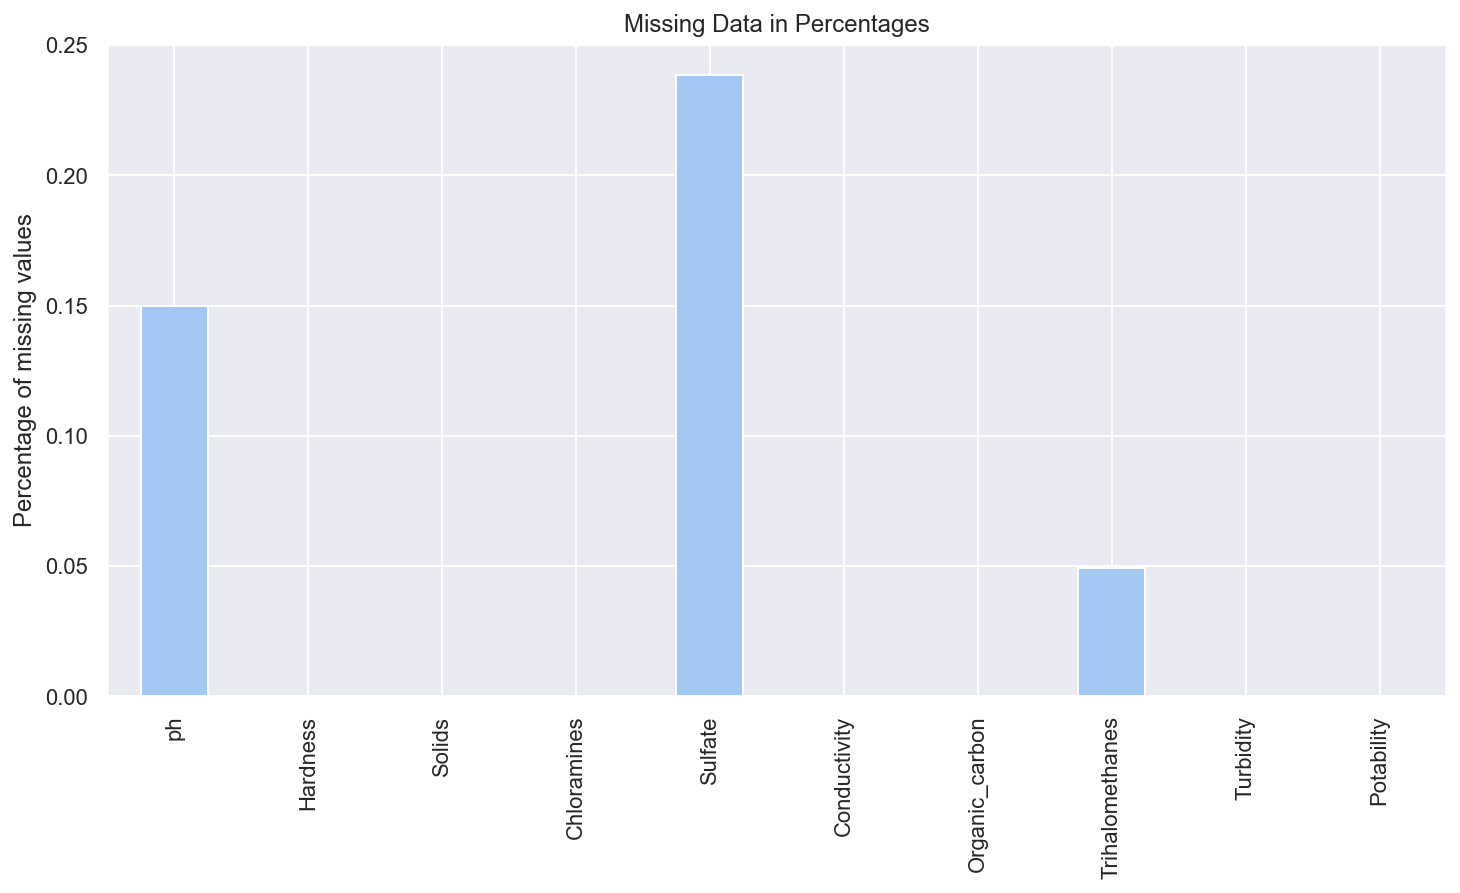

In [198]:
df.isnull().mean().plot.bar(figsize=(12,6)) 
plt.ylabel('Percentage of missing values') 
plt.title('Missing Data in Percentages');

In [199]:
#Change ph to the pH as this is the correct designation
df = df.rename(columns={'ph':'pH'})
df.head()

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

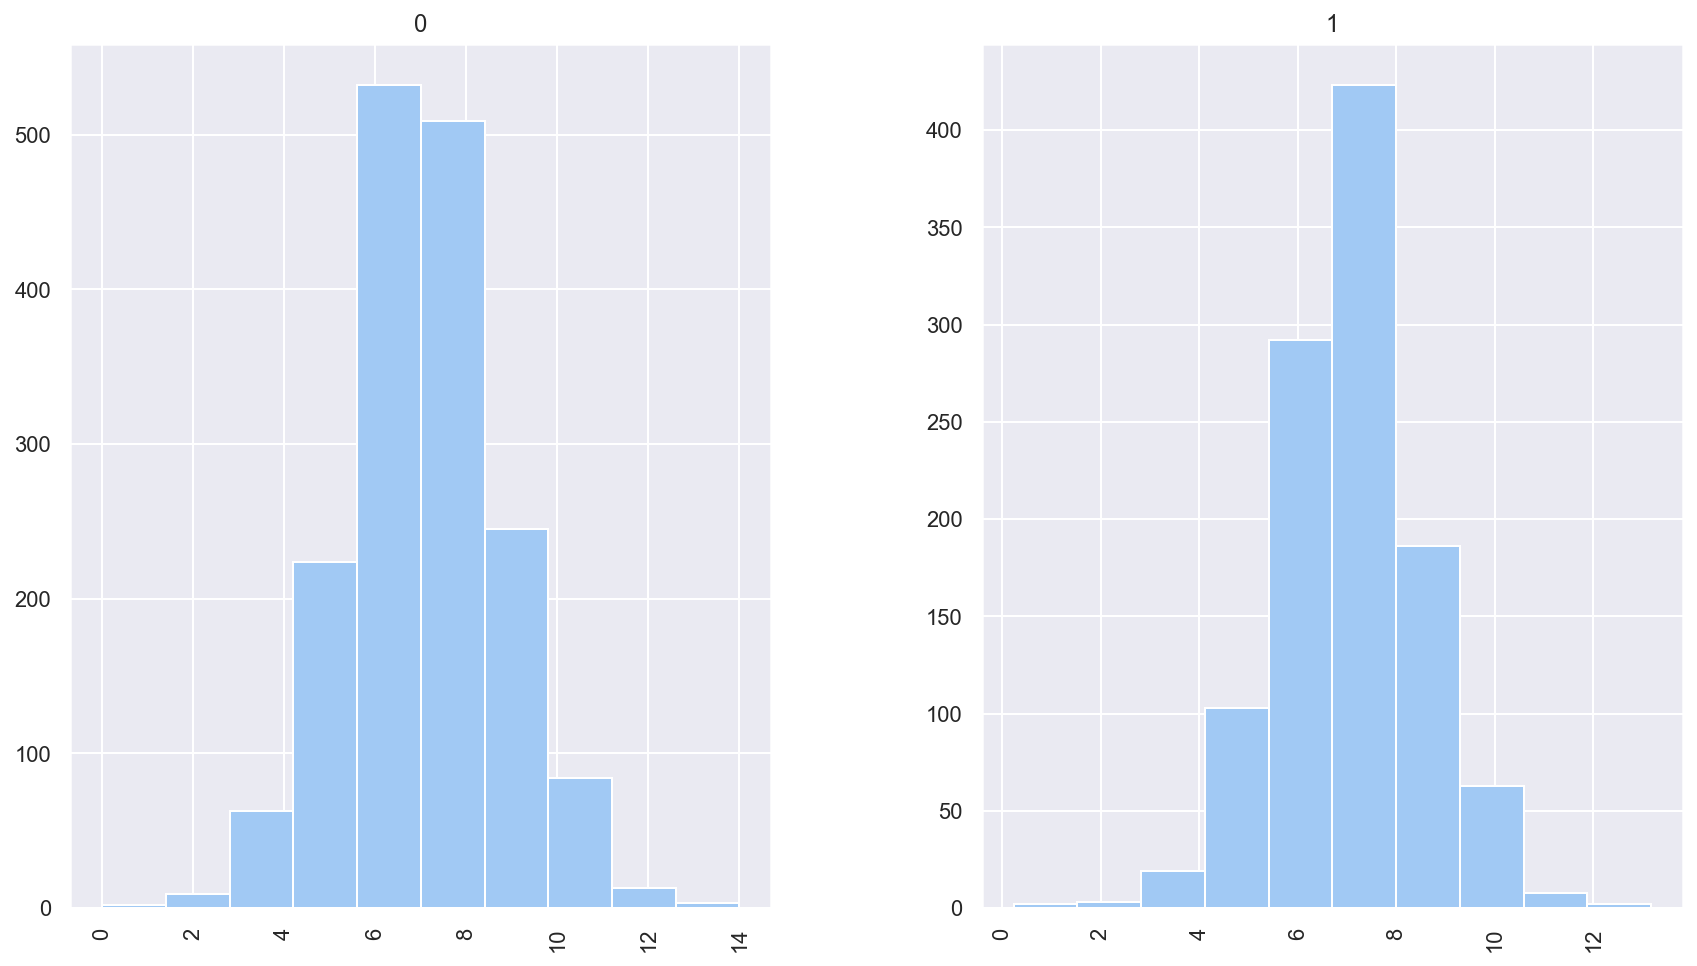

In [200]:
df.hist(column='pH', by='Potability')

<AxesSubplot:xlabel='pH', ylabel='Density'>

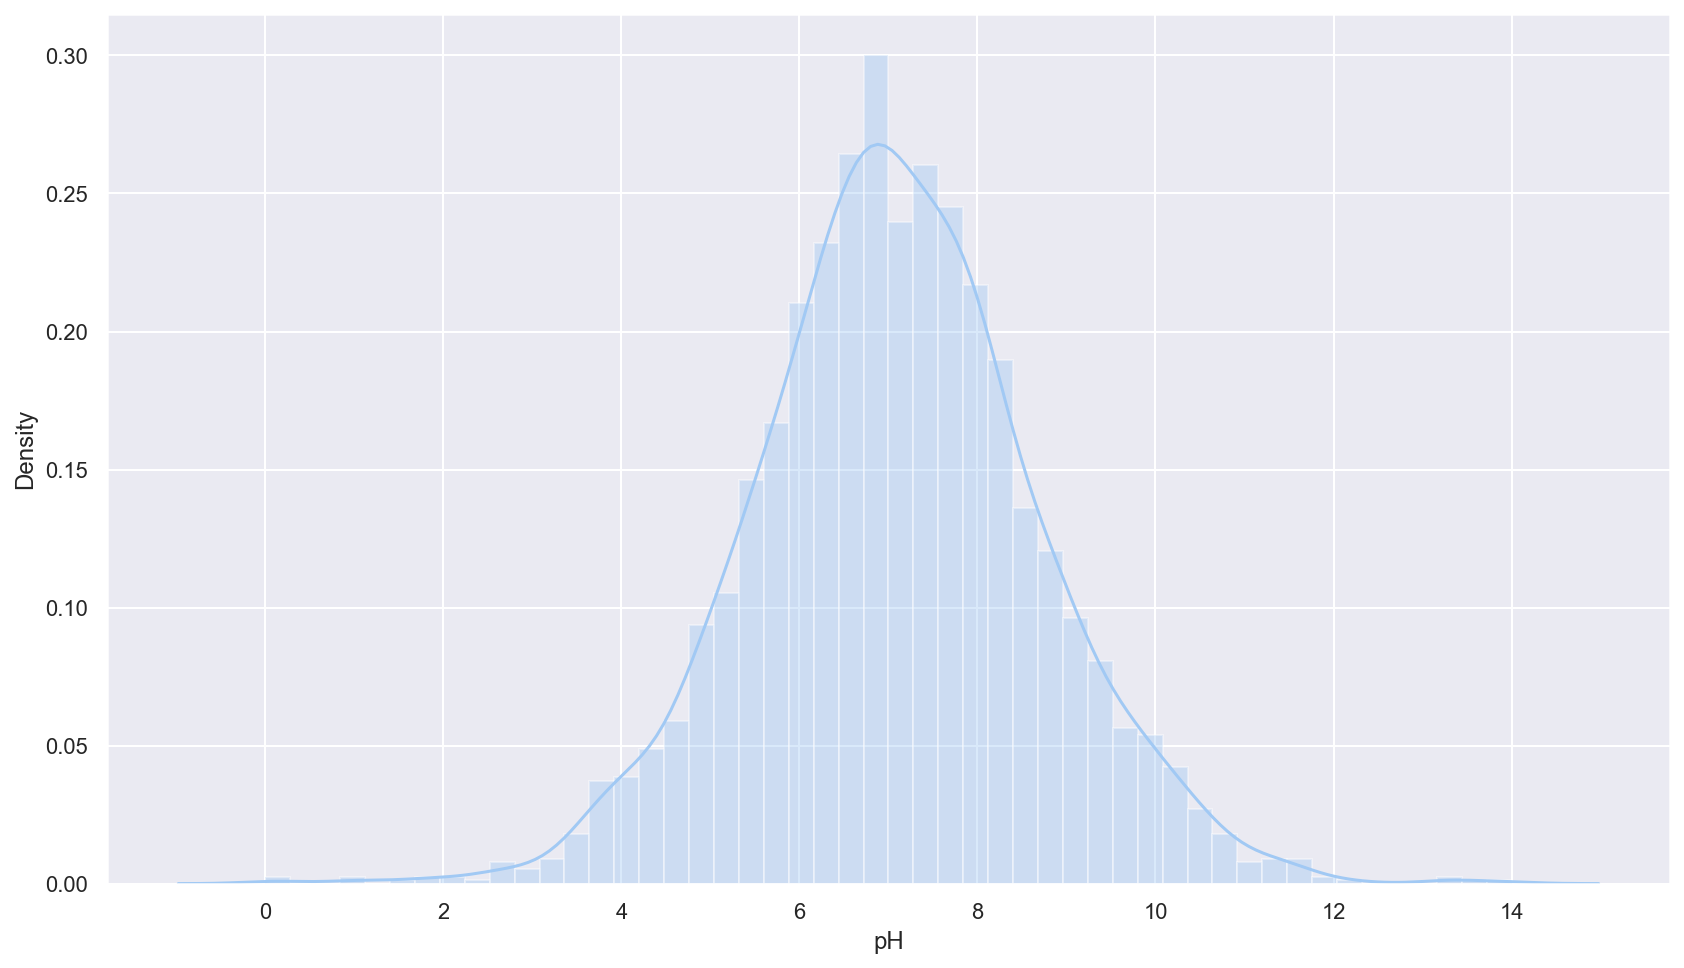

In [201]:
sns.distplot(df.pH)

In [202]:
#first replace the Nan values with the mean of the classification
pH = df.query('Potability == 1')['pH'][df['pH'] == 0].index
df.loc[pH,'pH'] = df.query('Potability == 1')['pH'][df['pH'] == 0 ].mean()
pH_nan = df.query('Potability == 1')['pH'][df['pH'].isna()].index
df.loc[pH_nan,'pH'] = df.query('Potability == 1')['pH'][df['pH'].notna()].mean()

#Set any value that fails the guideline for pH not to be potable
df.loc[~df.pH.between(6.5, 8.5), 'Potability'] = 0

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

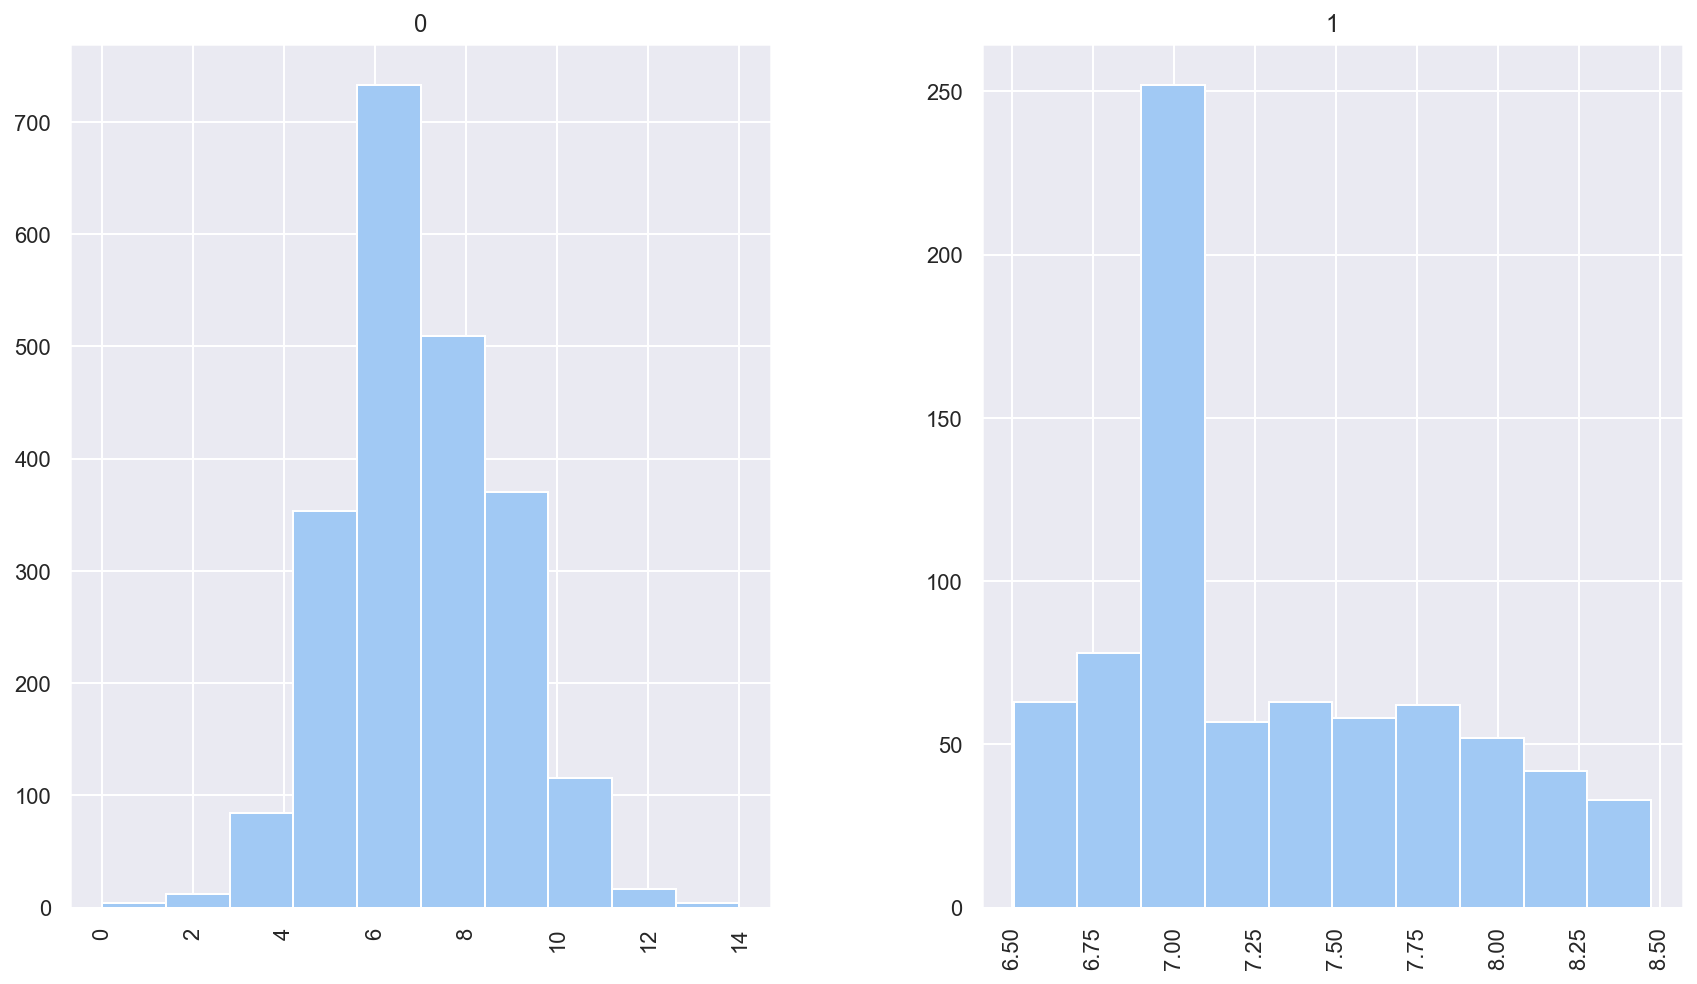

In [203]:
df.hist(column='pH', by='Potability')

# Sulfate

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

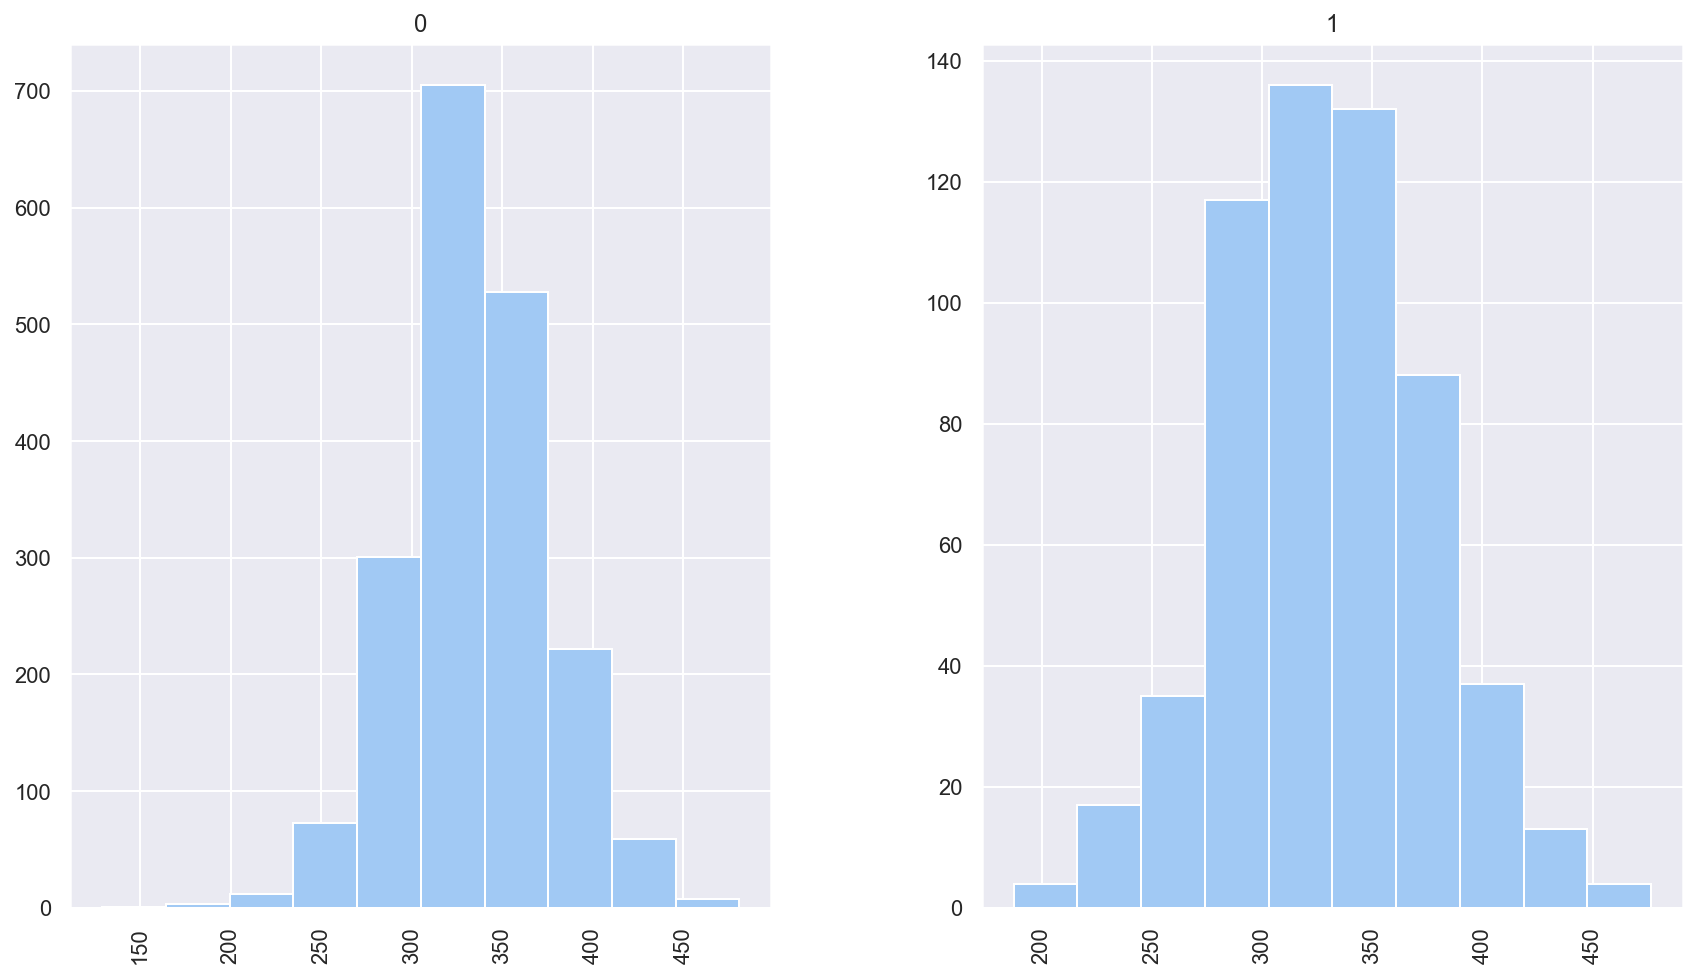

In [204]:
df.hist(column='Sulfate', by='Potability')

<AxesSubplot:xlabel='Sulfate', ylabel='Density'>

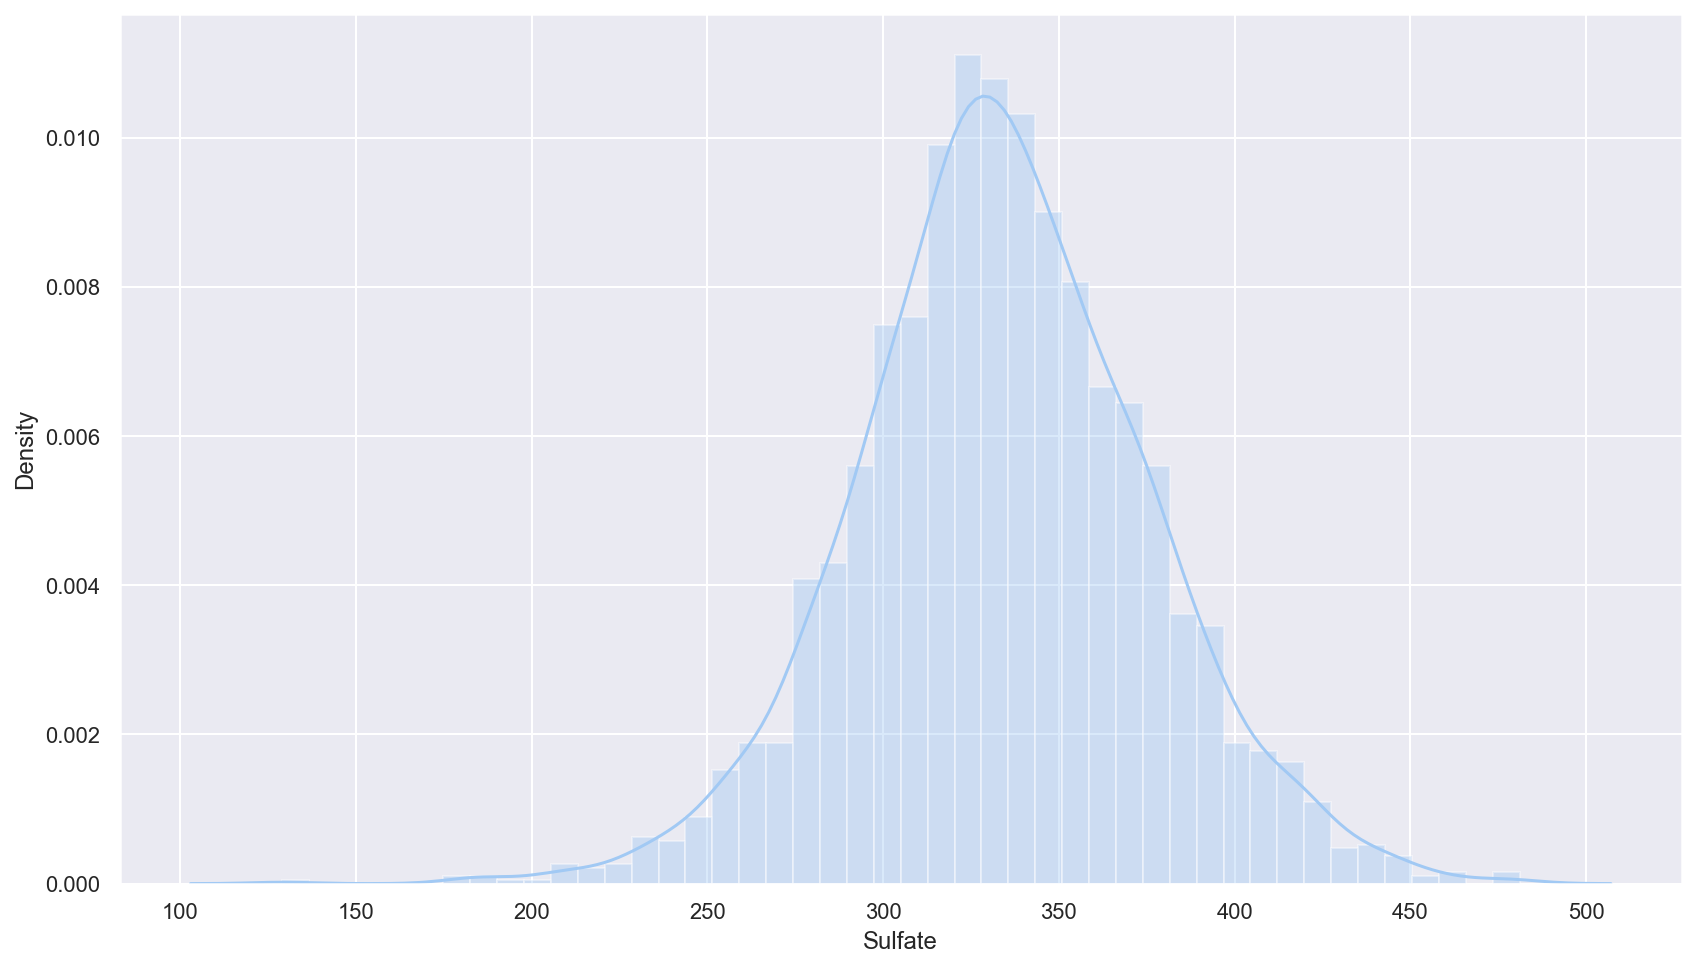

In [205]:
sns.distplot(df.Sulfate)

In [206]:
#first replace the Nan values with the mean of the classification
Sulfate_nan = df.query('Potability == 1')['Sulfate'][df['Sulfate'].isna()].index
df.loc[Sulfate_nan,'Sulfate'] = df.query('Potability == 1')['Sulfate'][df['Sulfate'].notna()].mean()
#Set any value that fails the guideline for pH not to be potable
df.loc[~df.pH.between(6.5, 8.5), 'Potability'] = 0

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

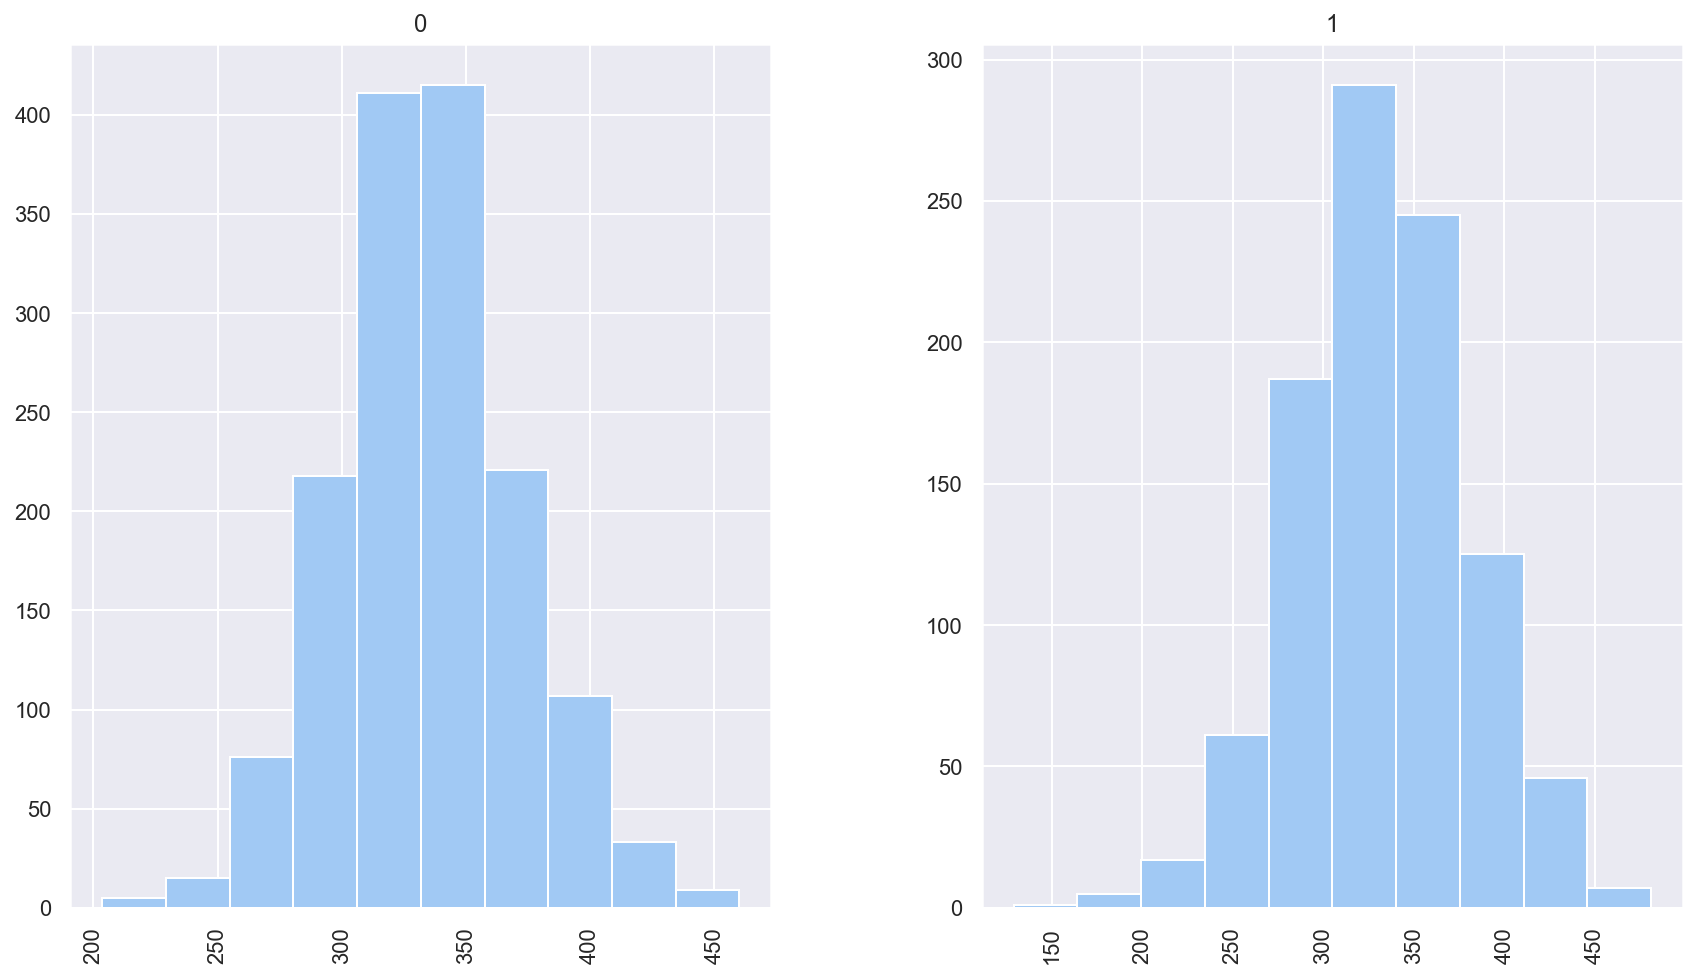

In [295]:
df.hist(column='Sulfate', by='Potability')

# Trihalomethanes

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

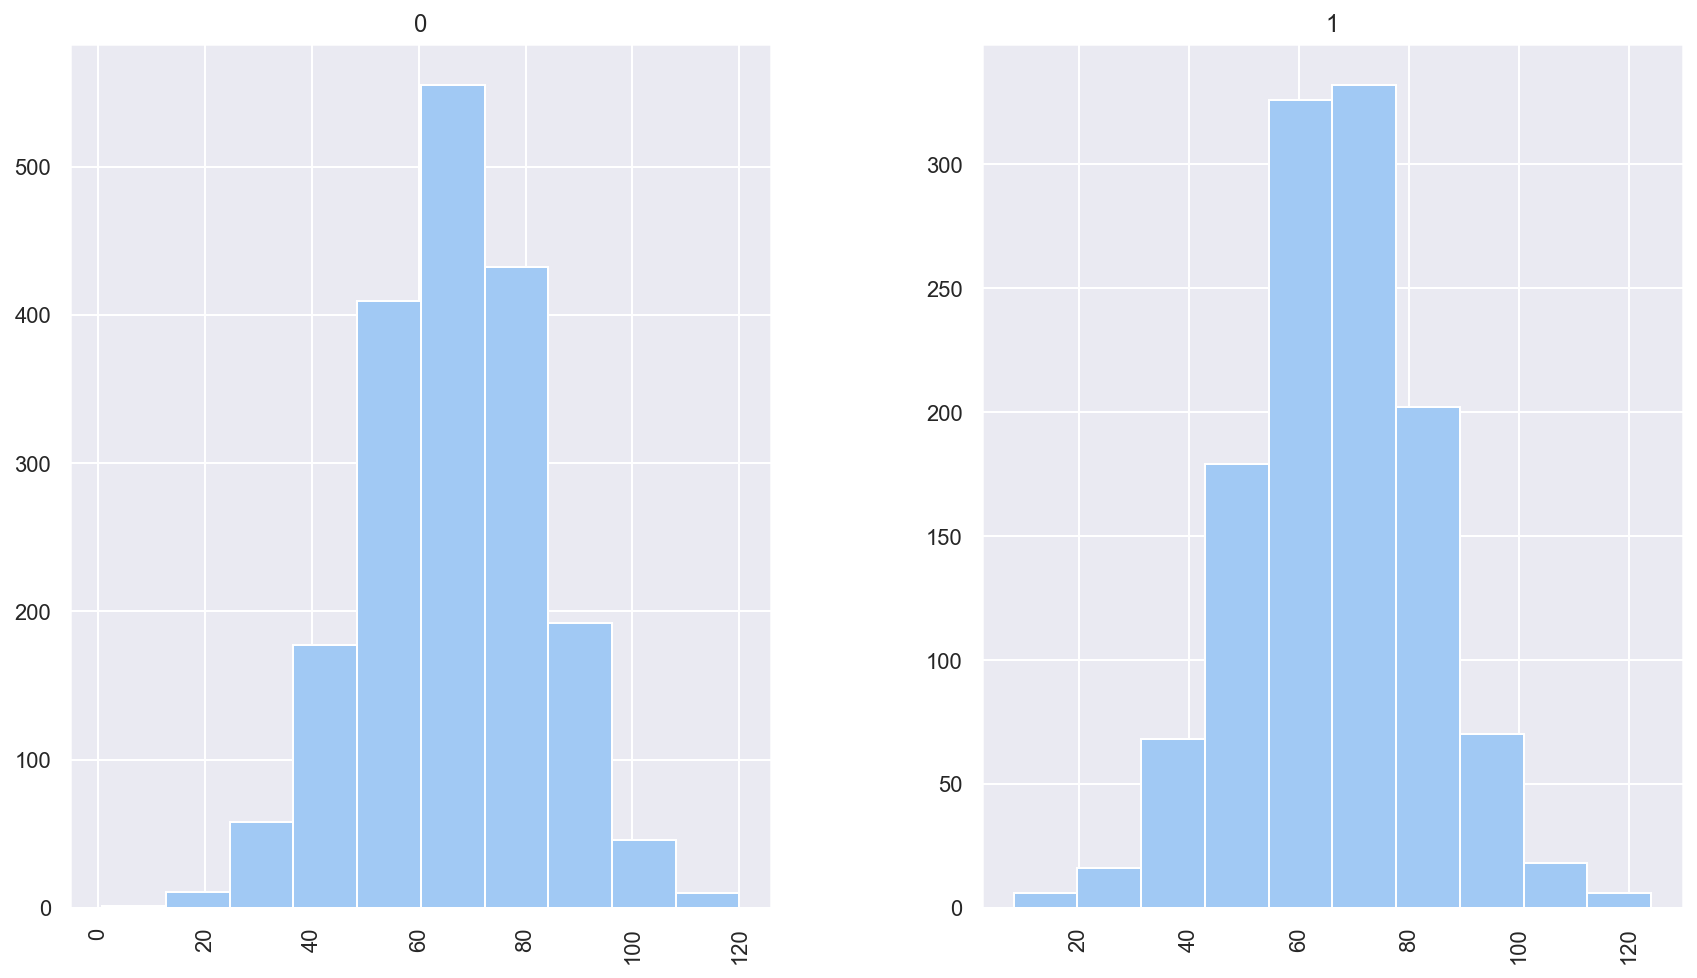

In [296]:
df.hist(column='Trihalomethanes', by='Potability')

<AxesSubplot:xlabel='Trihalomethanes', ylabel='Density'>

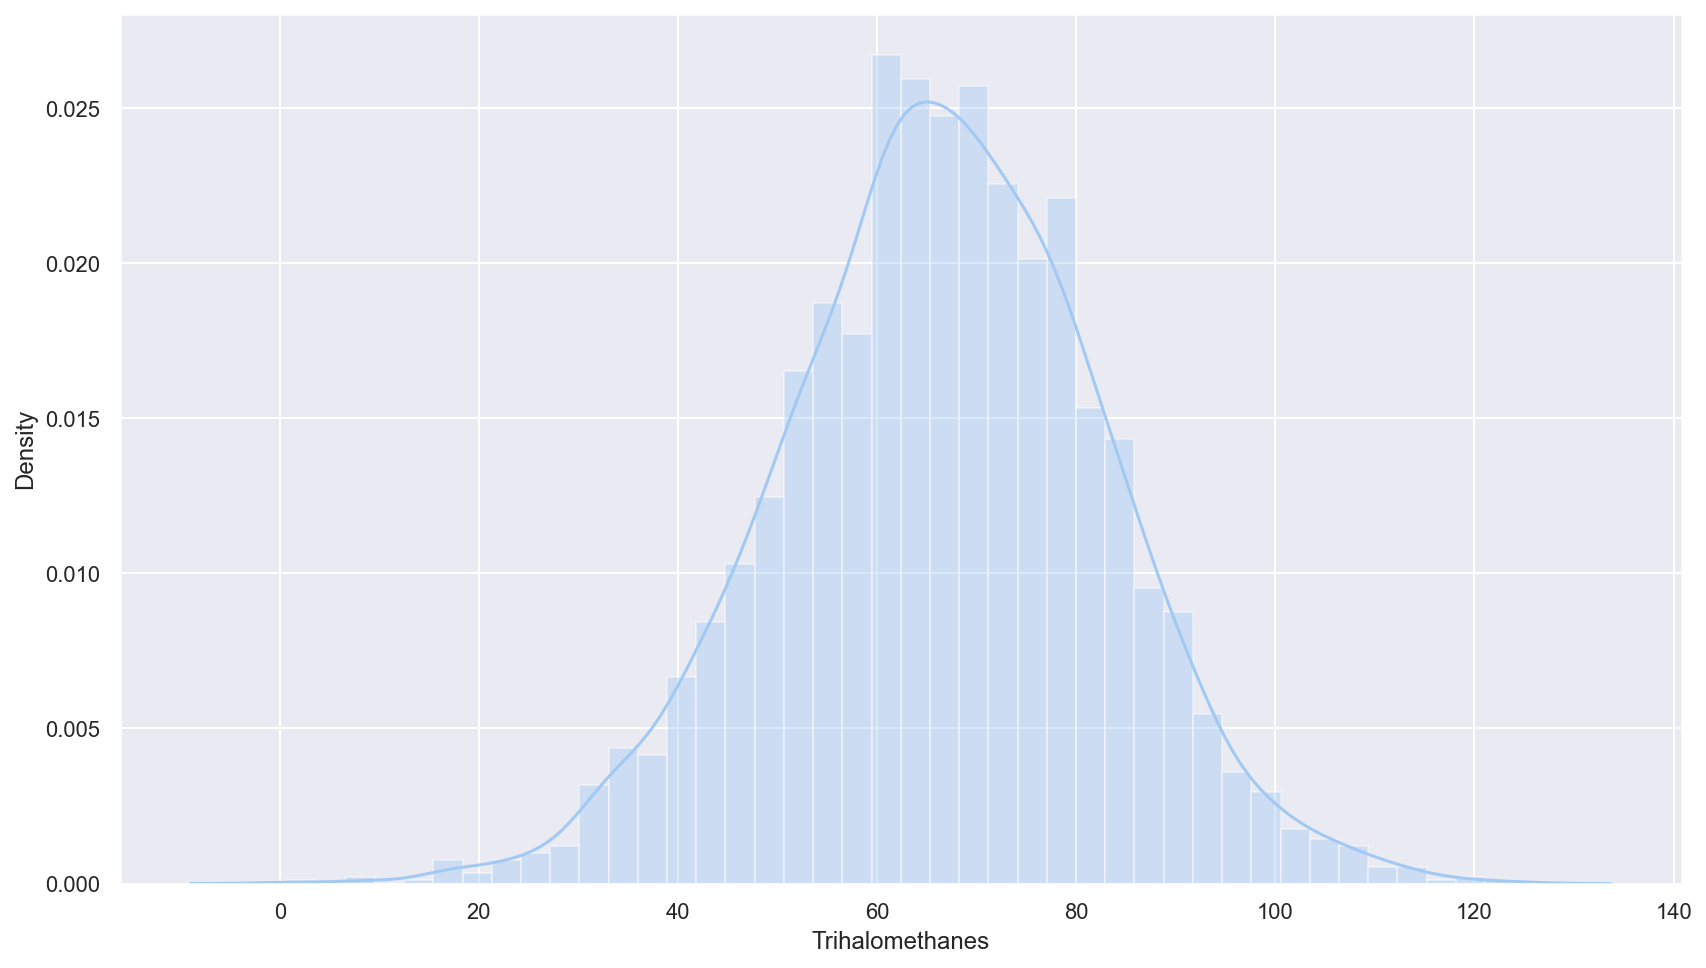

In [209]:
sns.distplot(df.Trihalomethanes)

In [210]:
#first we replace some of the missing values and reclassify the values above the safe limits
THM_nan = df.query('Potability == 1')['Trihalomethanes'][df['Trihalomethanes'].isna()].index
df.loc[THM_nan,'Trihalomethanes'] = df.query('Potability == 1')['Trihalomethanes'][df['Trihalomethanes'].notna()].mean()
#Set any value that fails the guideline for Trihalomethanes not to be potable
df.loc[df.Trihalomethanes > 80, 'Potability'] = 0  

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

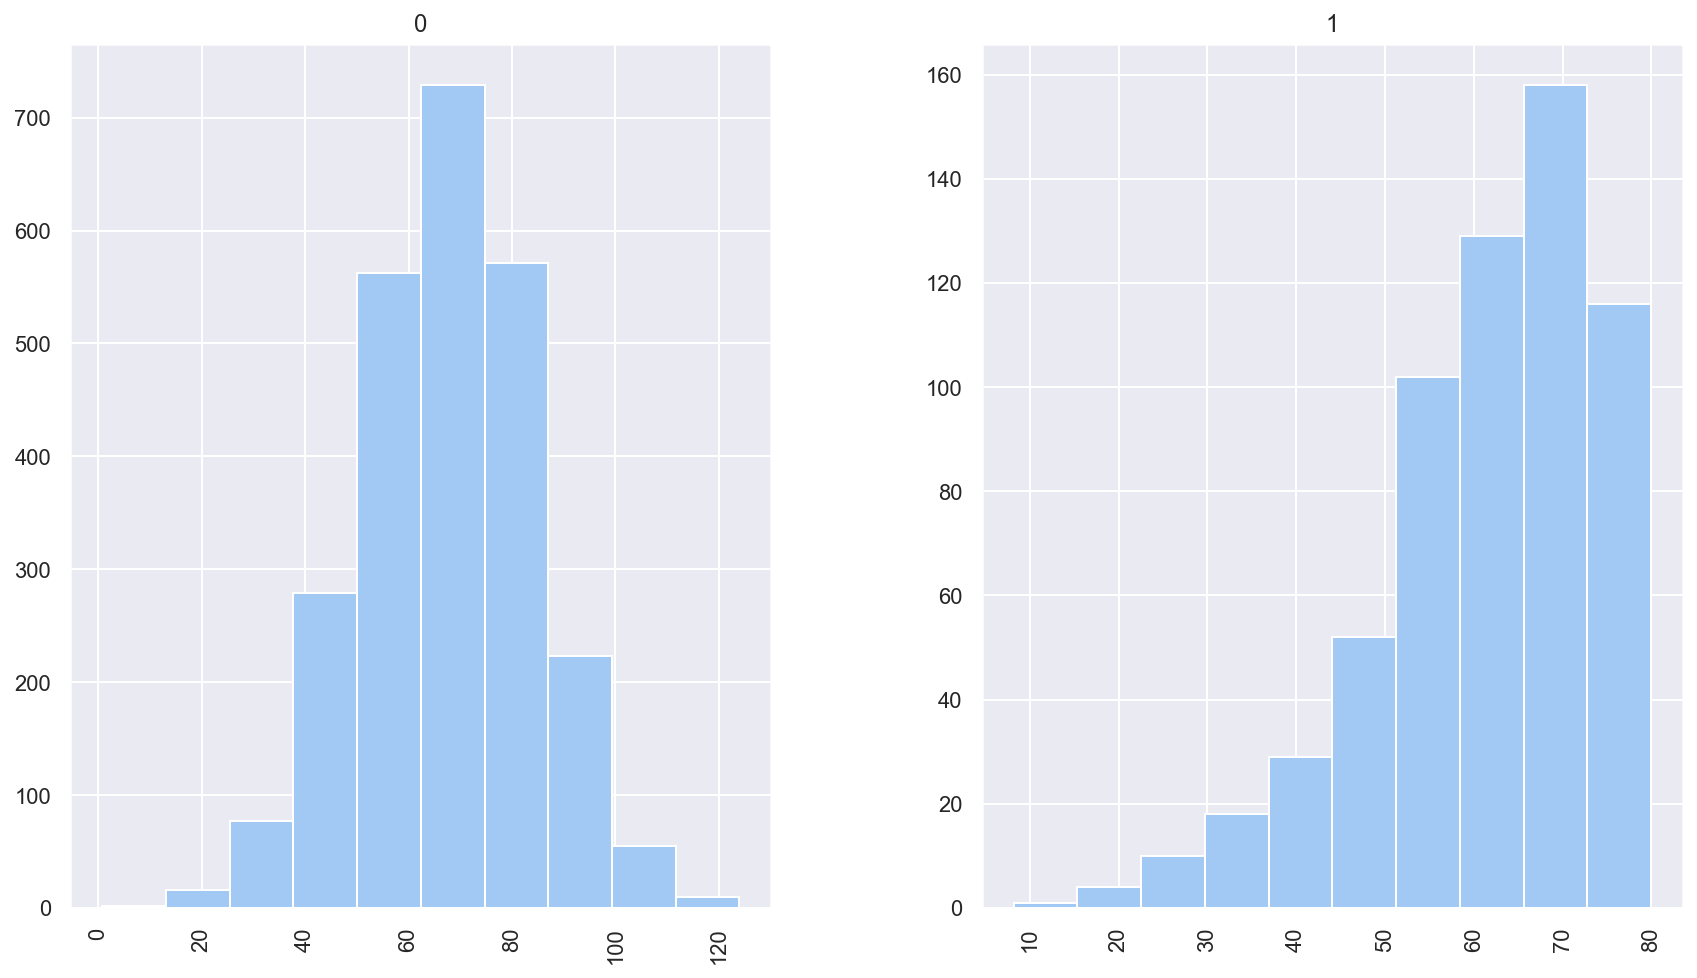

In [211]:
df.hist(column='Trihalomethanes', by='Potability')

In [212]:
# Second time checking number of rows and columns 
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

# Second time cecking percentage of null values
print("---------------------")
print("Percentage of Null Values:")
print(round(df.isnull().sum() * 100/df.shape[0]))

Number of Rows: 3276
Number of Columns: 10
---------------------
Percentage of Null Values:
pH                 10.0
Hardness            0.0
Solids              0.0
Chloramines         0.0
Sulfate            18.0
Conductivity        0.0
Organic_carbon      0.0
Trihalomethanes     4.0
Turbidity           0.0
Potability          0.0
dtype: float64


## Data Exploration

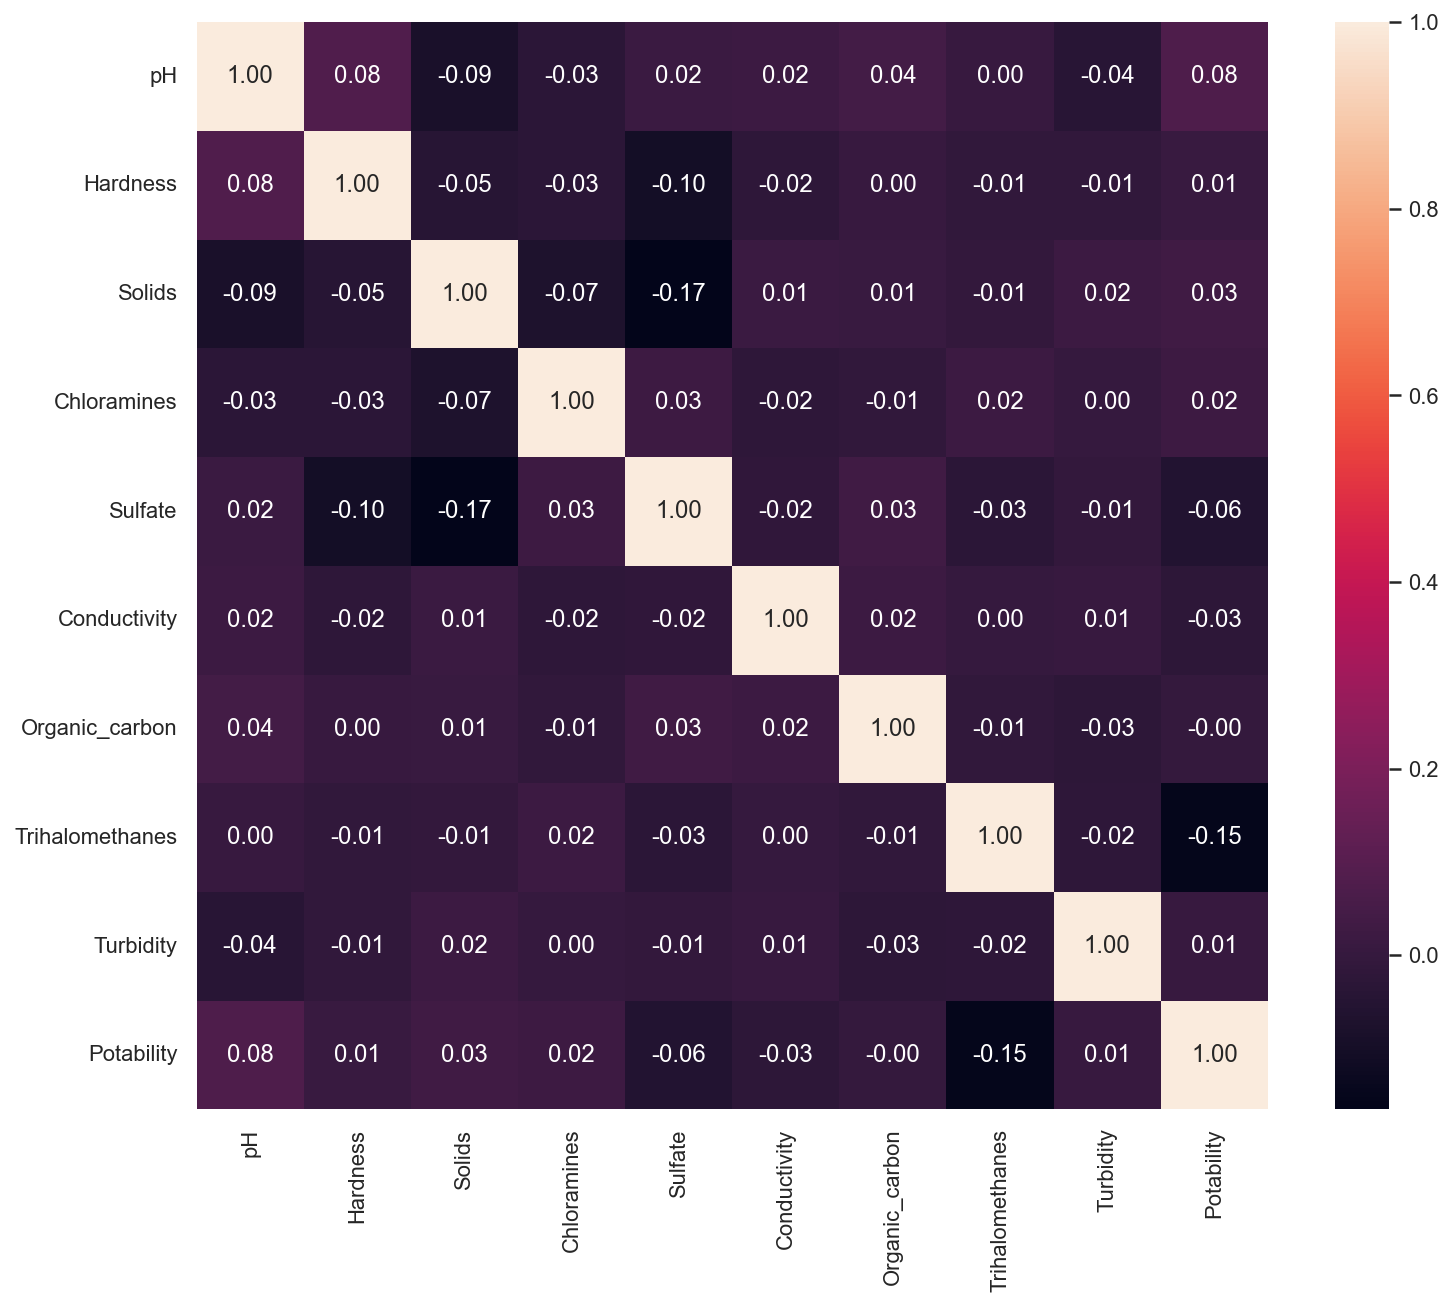

In [213]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

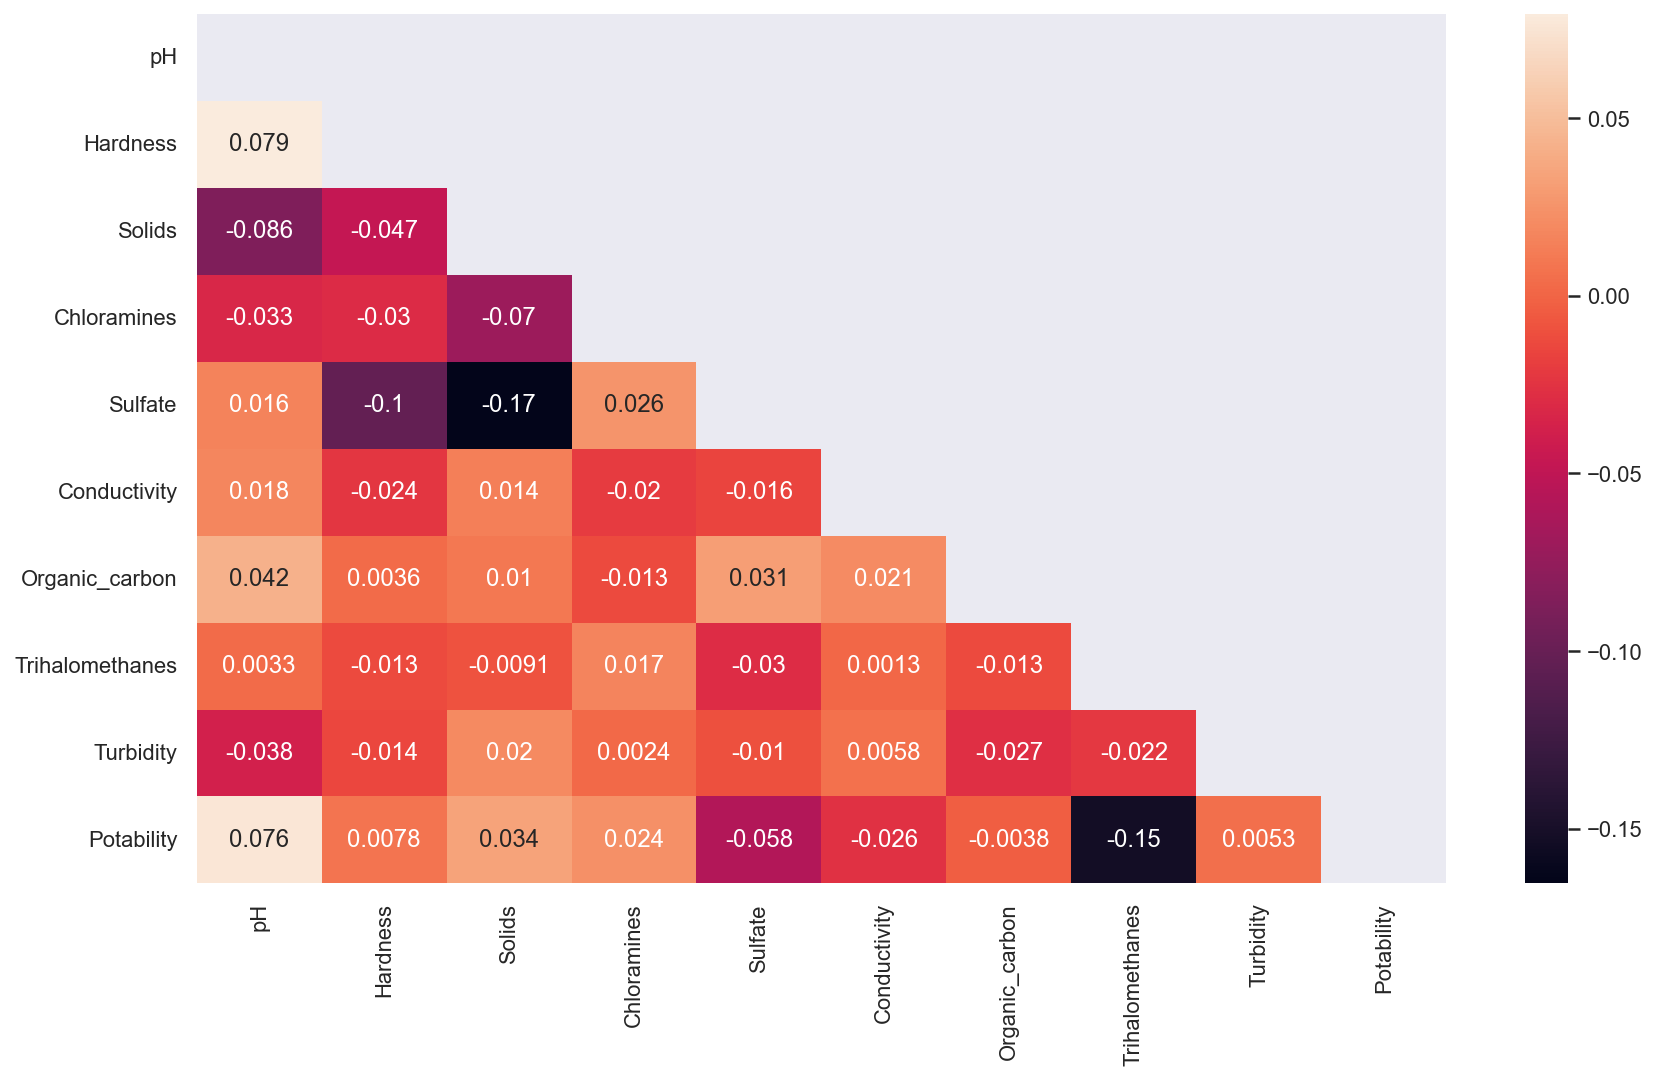

In [214]:
corr = df.corr()
corr_mask = np.triu(np.ones(shape=corr.shape), k=0)
sns.heatmap(corr, annot=True, mask=corr_mask);

In [215]:
correlation = df.corr()
print(correlation['Potability'].sort_values(ascending = False),'\n')

Potability         1.000000
pH                 0.075514
Solids             0.034122
Chloramines        0.023646
Hardness           0.007774
Turbidity          0.005285
Organic_carbon    -0.003810
Conductivity      -0.025960
Sulfate           -0.057800
Trihalomethanes   -0.153081
Name: Potability, dtype: float64 



# 
KNN and transformation for the missing values

In [216]:
models={'Decision Trees':DecisionTreeClassifier()}

In [217]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [218]:
X

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,329.003387,392.449580,19.903225,66.559316,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658


In [219]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    0
3272    1
3273    0
3274    0
3275    1
Name: Potability, Length: 3276, dtype: int64

In [220]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [221]:
y_train.shape

(2620,)

In [222]:
y_test.shape

(656,)

In [223]:
from cProfile import label
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [183]:
classifier = DecisionTreeClassifier(min_samples_leaf=50)

In [184]:
classifier.fit(X_train, y_train)

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [234]:
label_encoder.classes_

array([0, 1], dtype=int64)

In [235]:
text_representation = classifier.export_text(classifier)
print(text_representation)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'export_text'

In [236]:
print("Train Score {}".format(classifier.score(X_train, y_train)))
print("Ttest Score {}".format(classifier.score(X_test, y_test)))

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [237]:
classifier.feature_importances_

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

In [238]:
features_importance = pd.DataFrame(
    {"features" : X.columns,
    "values": classifier.feature_importances_})

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

In [239]:
features_importance.sort_values(by='values', ascending=False)
#After seeting that the 2 most important features are pH and Trihalomethanes 
#and both of them have missing NaN's we agree that we can't replace the NaN's with the mean but use KNN 

NameError: name 'features_importance' is not defined

# KNN and transformation for the missing values

In [298]:
df2 = pd.read_csv("./dataset/water_potability.csv")
df2.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [299]:
# Checking number of rows and columns 
print("Number of Rows:", df2.shape[0])
print("Number of Columns:", df2.shape[1])

# Checking percentage of null values
print("*****Percentage of Null Values*****")
print(round(df2.isnull().sum() * 100/df2.shape[0]))

Number of Rows: 3276
Number of Columns: 10
*****Percentage of Null Values*****
ph                 15.0
Hardness            0.0
Solids              0.0
Chloramines         0.0
Sulfate            24.0
Conductivity        0.0
Organic_carbon      0.0
Trihalomethanes     5.0
Turbidity           0.0
Potability          0.0
dtype: float64


In [300]:
from sklearn.impute import KNNImputer

In [301]:
imputer = KNNImputer(n_neighbors=10, weights="uniform")

In [302]:
l=imputer.fit_transform(df2)

In [303]:
df2=pd.DataFrame(l,columns=df2.columns)
df2

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.417308,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,341.794864,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,329.237272,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,341.343026,392.449580,19.903225,62.554876,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,335.228216,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,336.711411,402.883113,11.168946,77.488213,4.708658,1.0


In [304]:
#The contents of the gaps are filled with the k-nearest neighbors method.
df2.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [305]:
#chyecking the difference between both of the datasets and if our decision was right
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


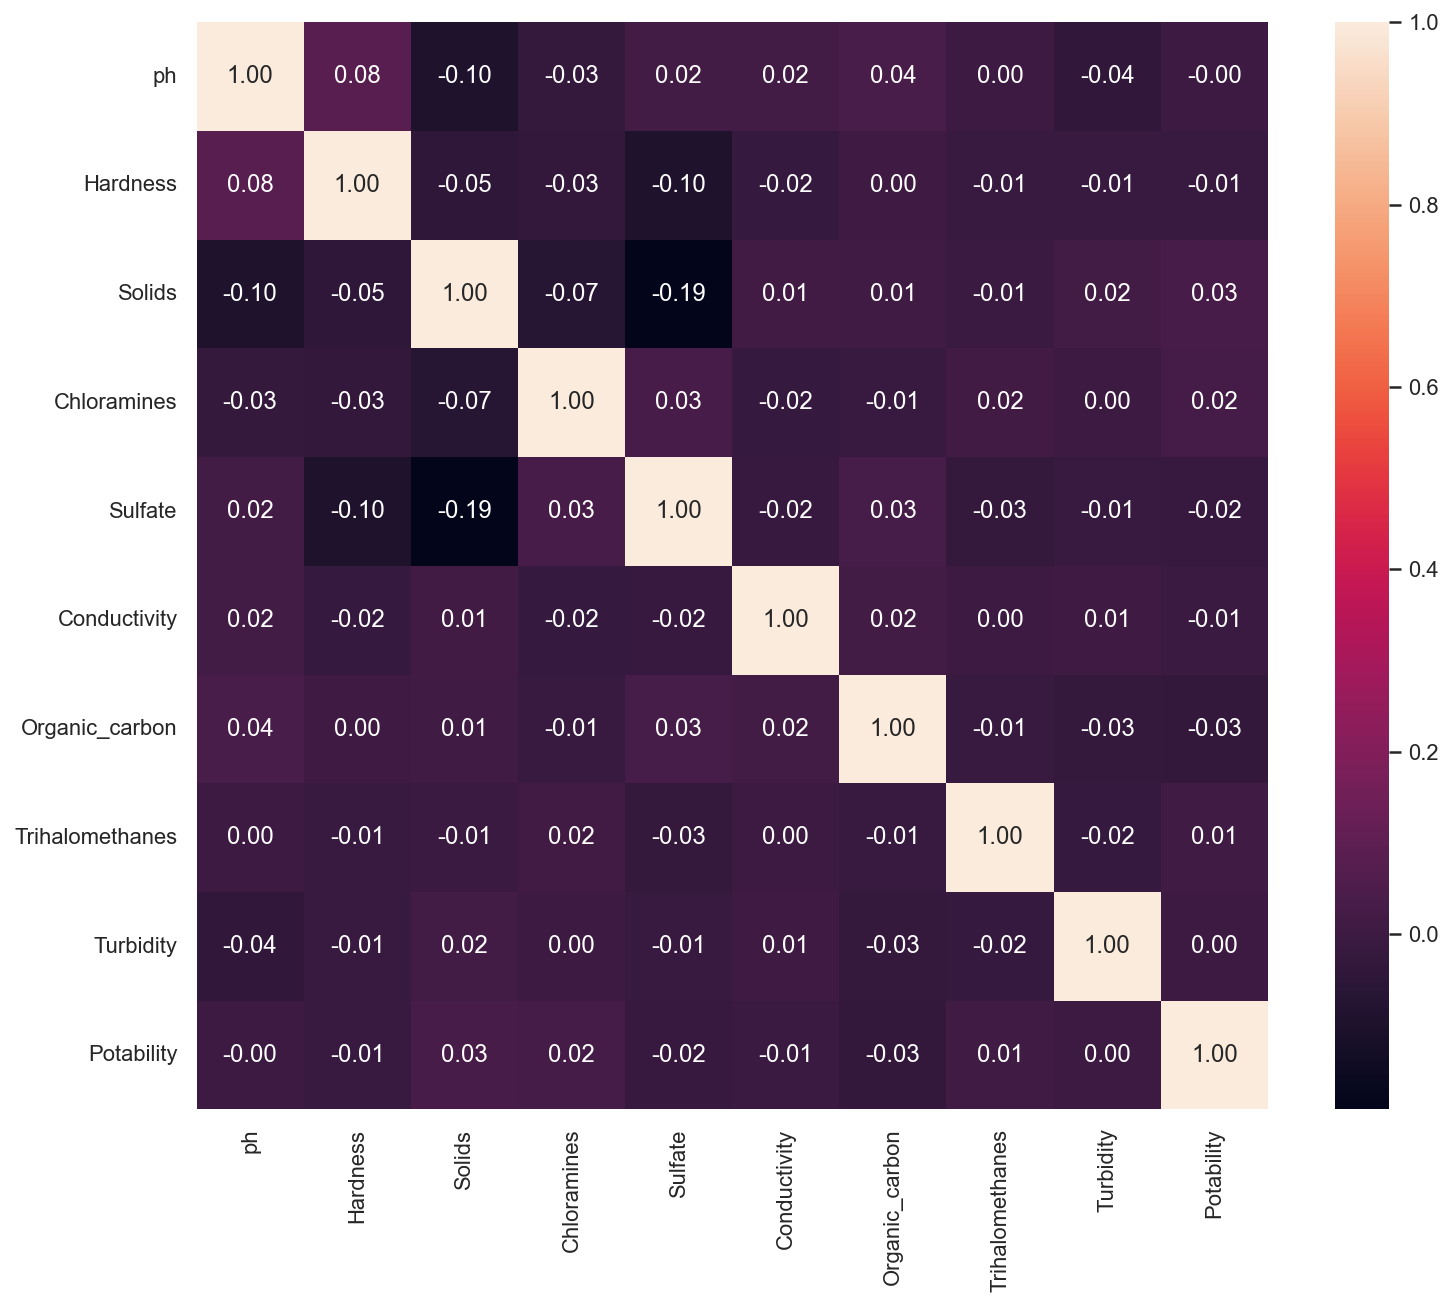

In [306]:
#correlation check
plt.figure(figsize=(12,10))
sns.heatmap(df2.corr(),annot=True,fmt='.2f')
plt.show()

In [307]:
df2['Potability'].value_counts(normalize=True)

0.0    0.60989
1.0    0.39011
Name: Potability, dtype: float64

## Feature Egineenring

## Predictive Models

In [308]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

In [309]:
df2.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [310]:
y = df2['Potability']

# 
Logistic Regression

In [311]:
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

In [312]:
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=45)

In [313]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [314]:
logireg = LogisticRegression()

In [315]:
logireg.fit(x_train,y_train)

LogisticRegression()

In [316]:
logireg.score(x_test,y_test)

0.6036585365853658

In [317]:
logireg.score(x_train,y_train)

0.6114503816793894

In [318]:
y_pred_train = logireg.predict(x_train)

In [319]:
len(y_pred_train)

2620

In [320]:
len(y_train)

2620

In [321]:
len(x_test)

656

In [322]:
y_pred_test = logireg.predict(x_test)
len(y_pred_test)

656

In [323]:
y_pred_test = logireg.predict(x_test)
y_pred_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [324]:
len(y_train)

2620

In [325]:
len(y_pred_train)

2620

In [326]:
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,roc_auc_score,confusion_matrix,roc_curve
print("Training accuracy: ",accuracy_score(y_train,y_pred_train))
lg_acc=accuracy_score(y_test,y_pred_test)
print("Test accuracy: ",lg_acc)

Training accuracy:  0.6114503816793894
Test accuracy:  0.6036585365853658


In [327]:
confusion_matrix(y_test,y_pred_test)

array([[396,   0],
       [260,   0]], dtype=int64)

Text(133.10000000000008, 0.5, 'Actual')

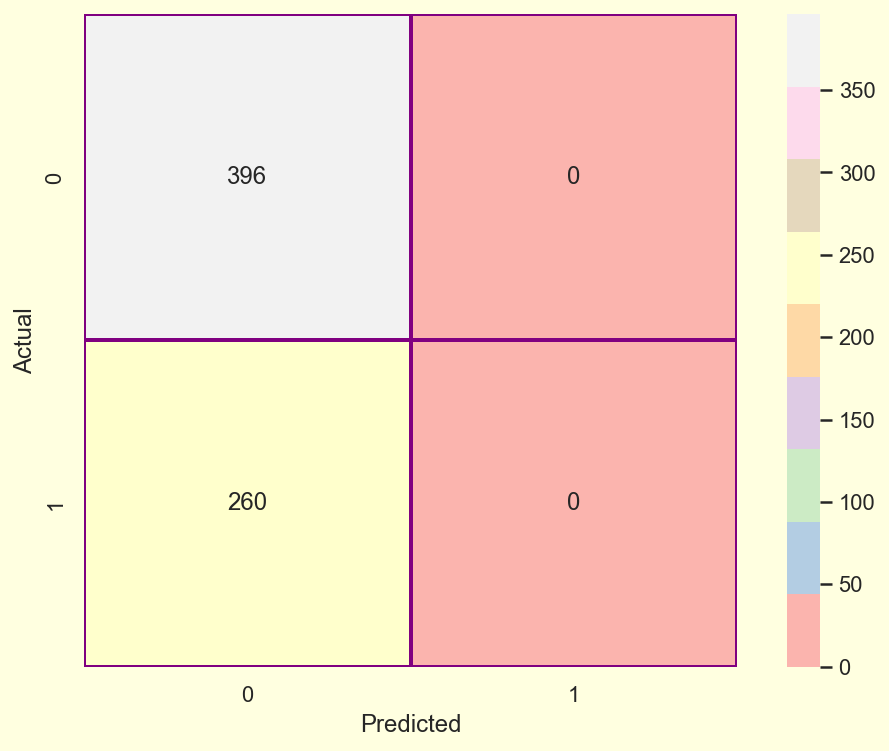

In [328]:
plt.figure(figsize=(9,6),facecolor='lightyellow')
sns.heatmap(confusion_matrix(y_test,y_pred_test),
            annot=True,linewidths=2,cmap='Pastel1',fmt='.3g',linecolor='purple',square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [329]:
roc_auc_score(y_test,y_pred_test)

0.5

In [330]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75       396
         1.0       0.00      0.00      0.00       260

    accuracy                           0.60       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.36      0.60      0.45       656



In [331]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
print((cross_val_score(logireg, x_train,y_train, cv=6)).mean())

0.611832483082457


# 
DECISION TREE

In [332]:
tree = DecisionTreeClassifier(criterion='gini',min_samples_leaf=2,min_samples_split=2,max_depth=70)

In [333]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=70, min_samples_leaf=2)

In [334]:
tree.score(x_test,y_test)

0.5929878048780488

In [335]:
y_pred_test_tree = tree.predict(x_test)
y_pred_test_tree

array([1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 0.

In [336]:
y_pred_train_tree =tree.predict(x_train)

In [337]:
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,roc_auc_score,confusion_matrix,roc_curve
print("Training accuracy: ",accuracy_score(y_train, y_pred_train_tree))
tree_acc=accuracy_score(y_test,y_pred_test_tree)
print("Test accuracy: ",tree_acc)

Training accuracy:  0.950381679389313
Test accuracy:  0.5929878048780488


In [338]:
roc_auc_score(y_test,y_pred_test_tree)

0.5657925407925408

Text(133.10000000000008, 0.5, 'Actual')

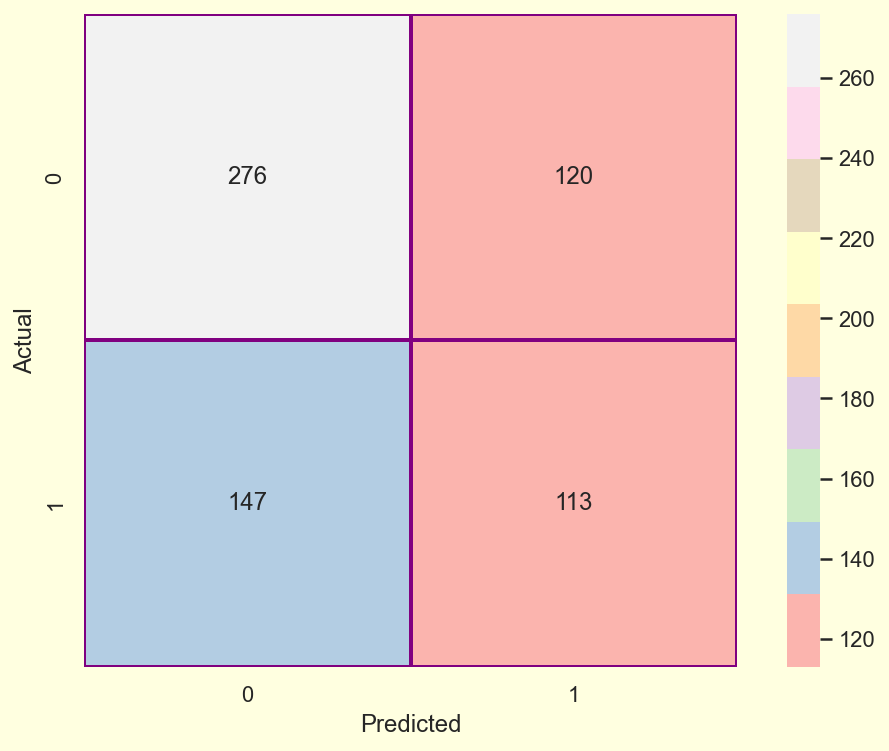

In [339]:
plt.figure(figsize=(9,6),facecolor='lightyellow')
sns.heatmap(confusion_matrix(y_test,y_pred_test_tree),
            annot=True,linewidths=2,cmap='Pastel1',fmt='.3g',linecolor='purple',square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [340]:
print(classification_report(y_test,y_pred_test_tree))

              precision    recall  f1-score   support

         0.0       0.65      0.70      0.67       396
         1.0       0.48      0.43      0.46       260

    accuracy                           0.59       656
   macro avg       0.57      0.57      0.57       656
weighted avg       0.59      0.59      0.59       656



# 
KNN Classifier

In [341]:
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)

In [342]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [343]:
knn.score(x_test,y_test)

0.6097560975609756

In [344]:
y_pred_test_knn = knn.predict(x_test)
y_pred_test_knn

array([0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0.

In [345]:
y_pred_train_knn = knn.predict(x_train)

In [346]:
print("Training accuracy: ",accuracy_score(y_train,y_pred_train_knn))
knn_acc=accuracy_score(y_test,y_pred_test_knn)
print("Test accuracy: ",knn_acc)

Training accuracy:  0.8213740458015267
Test accuracy:  0.6097560975609756


In [347]:
roc_auc_score(y_test,y_pred_test_knn)

0.581002331002331

Text(133.10000000000008, 0.5, 'Actual')

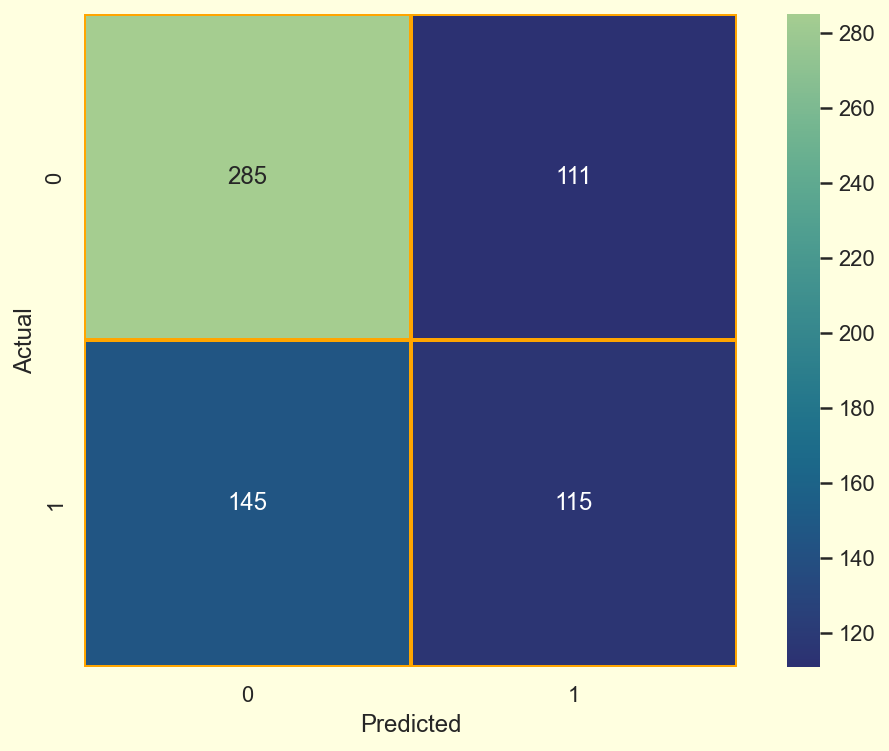

In [348]:
plt.figure(figsize=(9,6),facecolor='lightyellow')
sns.heatmap(confusion_matrix(y_test,y_pred_test_knn),annot=True,linewidths=2,cmap='crest_r',fmt='.3g',linecolor='orange',square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [349]:
print(classification_report(y_test,y_pred_test_knn))

              precision    recall  f1-score   support

         0.0       0.66      0.72      0.69       396
         1.0       0.51      0.44      0.47       260

    accuracy                           0.61       656
   macro avg       0.59      0.58      0.58       656
weighted avg       0.60      0.61      0.60       656



In [350]:
print((cross_val_score(knn, x_train,y_train, cv=6)).mean())

0.6095572747185075


# 
Random Forest

In [351]:
rf = RandomForestClassifier(n_estimators=300,criterion='gini')

In [352]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300)

In [353]:
rf.score(x_test,y_test)

0.6692073170731707

In [354]:
y_pred_test_rf= rf.predict(x_test)
y_pred_test_rf

array([0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0.

In [355]:
y_pred_train_rf= rf.predict(x_train)

In [356]:
print("Training accuracy: ",accuracy_score(y_train, y_pred_train_rf))
rf_acc=accuracy_score(y_test,y_pred_test_rf)
print("Test accuracy: ",rf_acc)

Training accuracy:  1.0
Test accuracy:  0.6692073170731707


Text(133.10000000000008, 0.5, 'Actual')

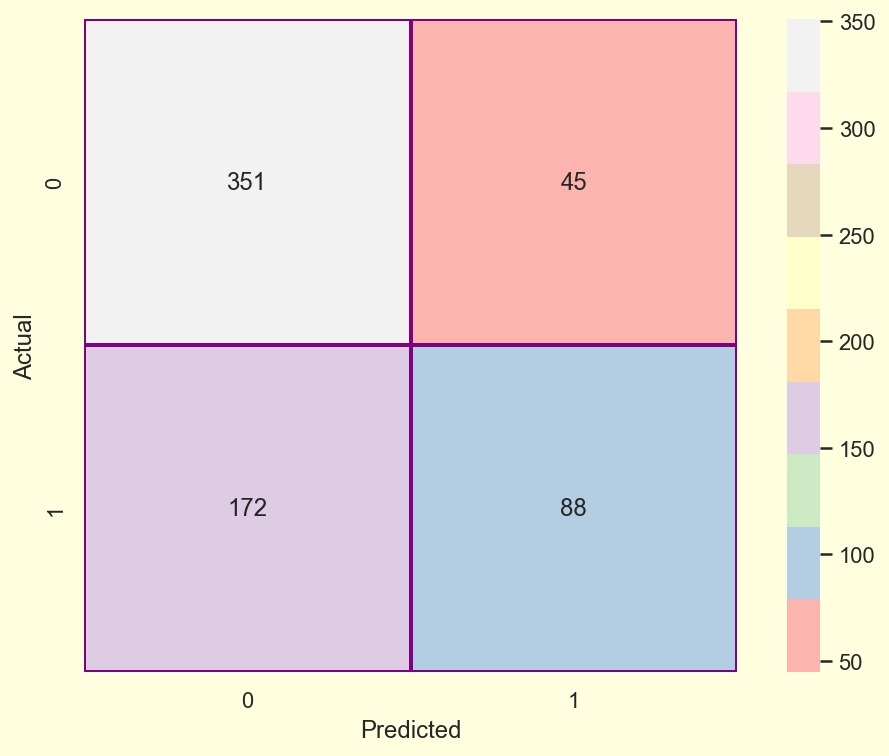

In [357]:
plt.figure(figsize=(9,6),facecolor='lightyellow')
sns.heatmap(confusion_matrix(y_test,y_pred_test_rf),annot=True,linewidths=2,cmap='Pastel1',fmt='.3g',linecolor='purple',square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [358]:
roc_auc_score(y_test,y_pred_test_rf)

0.6124125874125875

In [359]:
print(classification_report(y_test,y_pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.67      0.89      0.76       396
         1.0       0.66      0.34      0.45       260

    accuracy                           0.67       656
   macro avg       0.67      0.61      0.61       656
weighted avg       0.67      0.67      0.64       656



In [360]:
#tree = DecisionTreeClassifier(criterion='gini',min_samples_leaf=2,min_samples_split=2,max_depth=70)
#rf = RandomForestClassifier(n_estimators=300,criterion='gini')

In [361]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

In [ ]:
#para_tree = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[0,1,2,4,5,10,20,30,40,80,100]}
#grid_tree = GridSearchCV(tree, param_grid=para_tree, cv=5)
#params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
#grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

In [364]:
#grid_tree.fit(X_train, y_train)
#grid_rf.fit(X_train, y_train)

#print("Best parameters for Decision Tree:", grid_tree.best_params_)
#print("Best parameters for Random Forest:", grid_rf.best_params_)

In [365]:


#for model_name, model in model:
 
#    model.fit(X_train, Y_train)    
#    y_pred = model.predict(X_test)
#    accuracy = accuracy_score(Y_test,y_pred)
#    print('{:s} : {:.2f}'.format(model_name, accuracy))

# Confidence interval

In [366]:
df2

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.417308,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,341.794864,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,329.237272,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,341.343026,392.449580,19.903225,62.554876,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,335.228216,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,336.711411,402.883113,11.168946,77.488213,4.708658,1.0


In [367]:
df2.loc[df['Potability']==1]


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1.0
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1.0
252,7.186020,169.974849,23403.637304,8.519730,326.304596,475.573562,12.924107,50.861913,2.747313,1.0
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1.0
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,341.343026,392.449580,19.903225,62.554876,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,335.228216,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,336.711411,402.883113,11.168946,77.488213,4.708658,1.0


In [368]:
no_potable = df2.loc[df2['Potability']==0]

# ph

In [369]:
mean = no_potable['ph'].mean()
std = no_potable['ph'].std()
print(mean, std)
n = len(no_potable)
t =  stats.t.ppf(0.975, df=n-1)
error = t * std/(n**0.5)
print(error)
print((mean - error), (mean + error))

7.082630772705141 1.5593680886673302
0.06841672648477434
7.014214046220366 7.151047499189915


In [370]:
potable=df2.loc[df2['Potability']==1]

In [371]:
mean = potable['ph'].mean()
std = potable['ph'].std()
print(mean, std)
n = len(potable)
t =  stats.t.ppf(0.975, df=n-1)
error = t * std/(n**0.5)
print(error)
print((mean - error), (mean + error))

7.0754696501508745 1.3587109210859003
0.07456268718643103
7.000906962964444 7.150032337337305


# Sulfate

In [372]:
mean = no_potable['Sulfate'].mean()
std = no_potable['Sulfate'].std()
print(mean, std)
n = len(no_potable)
t =  stats.t.ppf(0.975, df=n-1)
error = t * std/(n**0.5)
print(error)
print((mean - error), (mean + error))

334.1548820359377 32.78149144136597
1.438276408249225
332.71660562768847 335.59315844418694


In [373]:
mean = potable['Sulfate'].mean()
std = potable['Sulfate'].std()
print(mean, std)
n = len(potable)
t =  stats.t.ppf(0.975, df=n-1)
error = t * std/(n**0.5)
print(error)
print((mean - error), (mean + error))

332.7951243432819 42.49977857847437
2.332282493988302
330.46284184929357 335.1274068372702


# Trihalomethanes

In [374]:
mean = no_potable['Trihalomethanes'].mean()
std = no_potable['Trihalomethanes'].std()
print(mean, std)
n = len(no_potable)
t =  stats.t.ppf(0.975, df=n-1)
error = t * std/(n**0.5)
print(error)
print((mean - error), (mean + error))

66.32042525540653 15.67682754349001
0.6878152951741904
65.63260996023234 67.00824055058072


In [375]:
mean = potable['Trihalomethanes'].mean()
std = potable['Trihalomethanes'].std()
print(mean, std)
n = len(potable)
t =  stats.t.ppf(0.975, df=n-1)
error = t * std/(n**0.5)
print(error)
print((mean - error), (mean + error))

66.60201867051825 16.00672044907193
0.8784091385465087
65.72360953197175 67.48042780906475


In [376]:
mean = no_potable['Chloramines'].mean()
std = no_potable['Chloramines'].std()
print(mean, std)
n = len(no_potable)
t =  stats.t.ppf(0.975, df=n-1)
error = t * std/(n**0.5)
print(error)
print((mean - error), (mean + error))

7.09217456344374 1.501044941498871
0.06585781891410199
7.0263167445296375 7.158032382357842


In [377]:
mean = potable['Chloramines'].mean()
std = potable['Chloramines'].std()
print(mean, std)
n = len(potable)
t =  stats.t.ppf(0.975, df=n-1)
error = t * std/(n**0.5)
print(error)
print((mean - error), (mean + error))

7.169338026214628 1.7029876826324724
0.09345574241869381
7.075882283795933 7.262793768633322


## Data Visualizations

In [378]:
def pieChartPlotter(dataset, columnName):

    values = dataset[columnName].value_counts()
    labels = dataset[columnName].unique()
    pie, ax = plt.subplots(figsize=[10, 6])

    patches, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.2f%%', shadow=True, pctdistance=.5,explode=[0.06]*dataset[columnName].unique()
                                       )

    plt.legend(patches, labels, loc="best")
    plt.title(columnName, color='white', fontsize=14)
    plt.setp(texts, color='white', fontsize=20)
    plt.setp(autotexts, size=10, color='black')
    autotexts[1].set_color('black')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

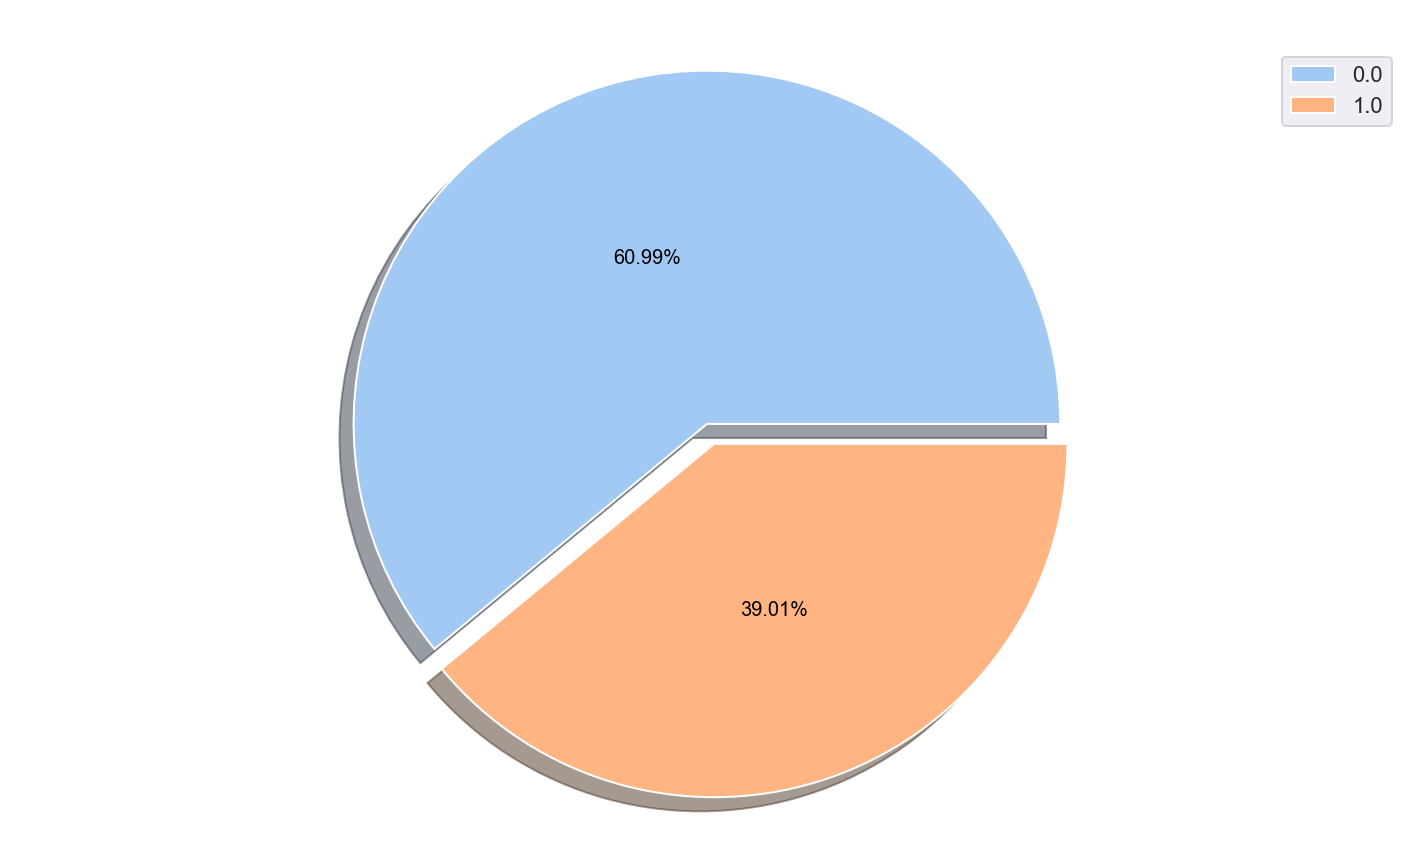

In [379]:
pieChartPlotter(df2, 'Potability') 

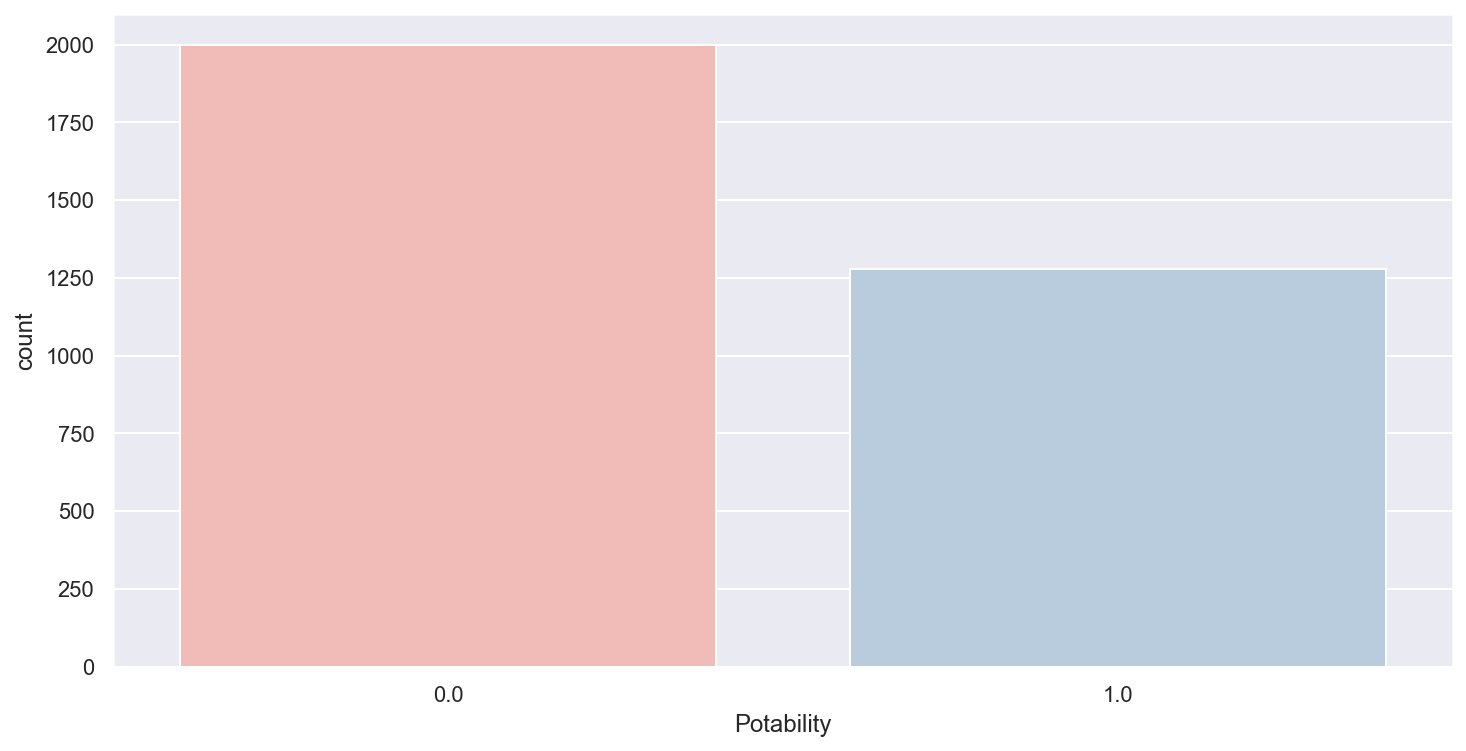

In [380]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Potability", data=df2, palette='Pastel1');

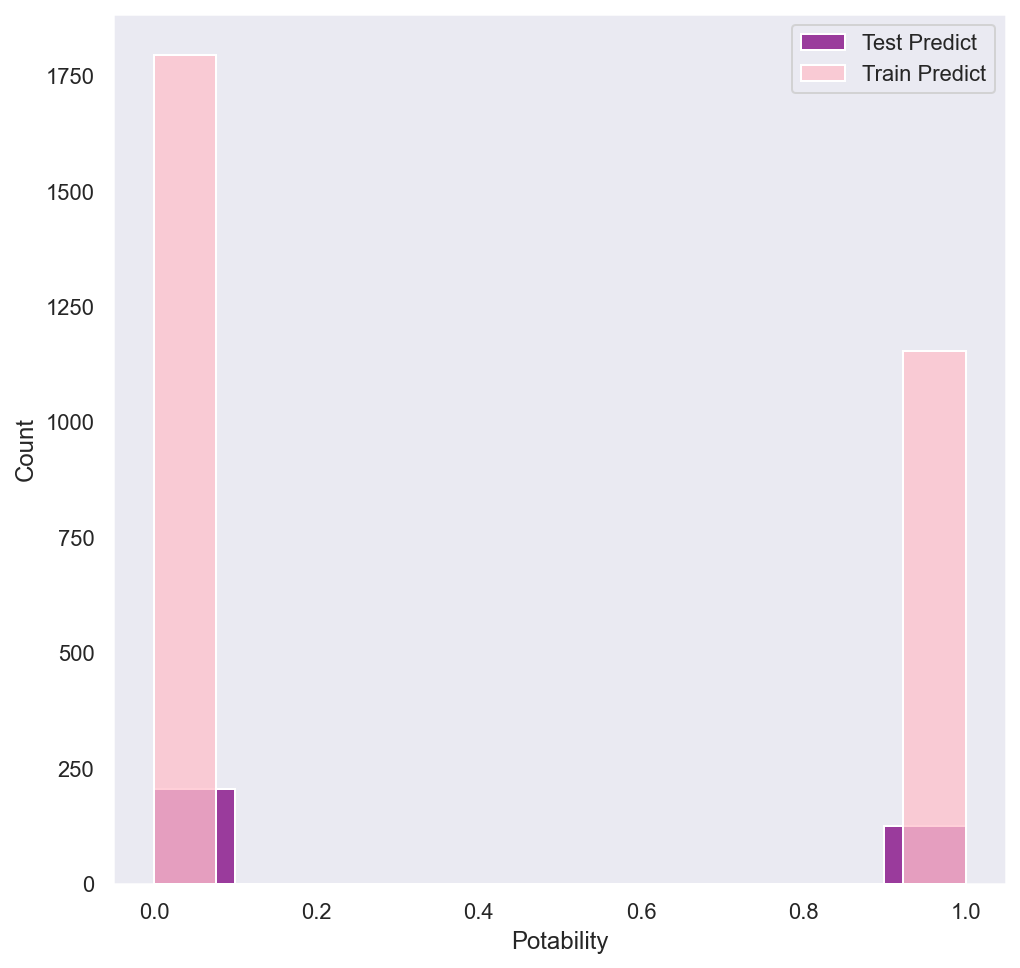

In [381]:
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(y_test, label='Test Predict', ax=ax, color='purple')
sns.histplot(y_train, label='Train Predict', ax=ax, color='pink')
ax.legend()
ax.grid()

Text(0.8, 1500, 'Safe for Human consumption')

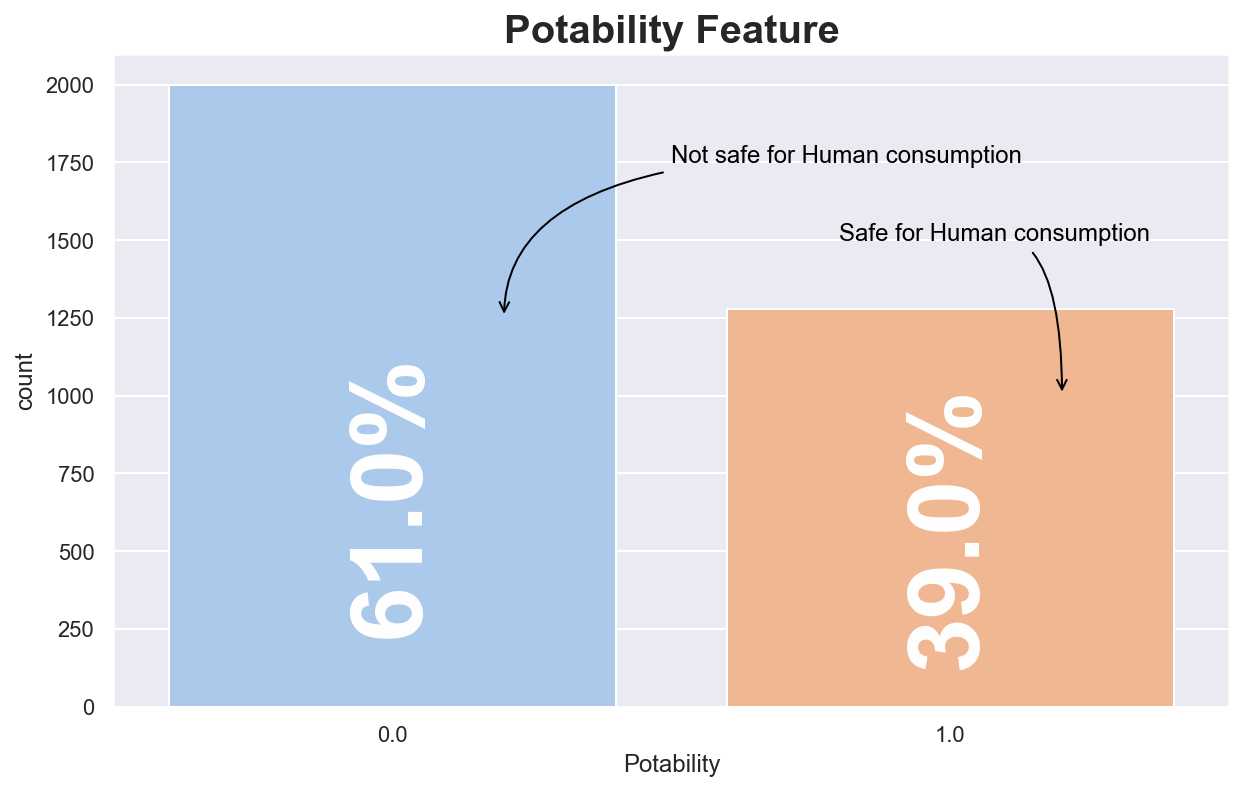

In [382]:
fig = plt.figure(figsize=(10,6))
ax=sns.countplot(data=df2, x='Potability')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(df)*100,0)}%", ha='center', size=50, weight='bold', rotation=90, color='white')
plt.title("Potability Feature", size=20, weight='bold')
plt.annotate(text="Not safe for Human consumption", xytext=(0.5,1750),xy=(0.2,1250), arrowprops =dict(arrowstyle="->", color='black', connectionstyle="angle3,angleA=0,angleB=90"), color='black')
plt.annotate(text="Safe for Human consumption", xytext=(0.8,1500),xy=(1.2,1000), arrowprops =dict(arrowstyle="->", color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')

array([<AxesSubplot:title={'center':'0.0'}>,
       <AxesSubplot:title={'center':'1.0'}>], dtype=object)

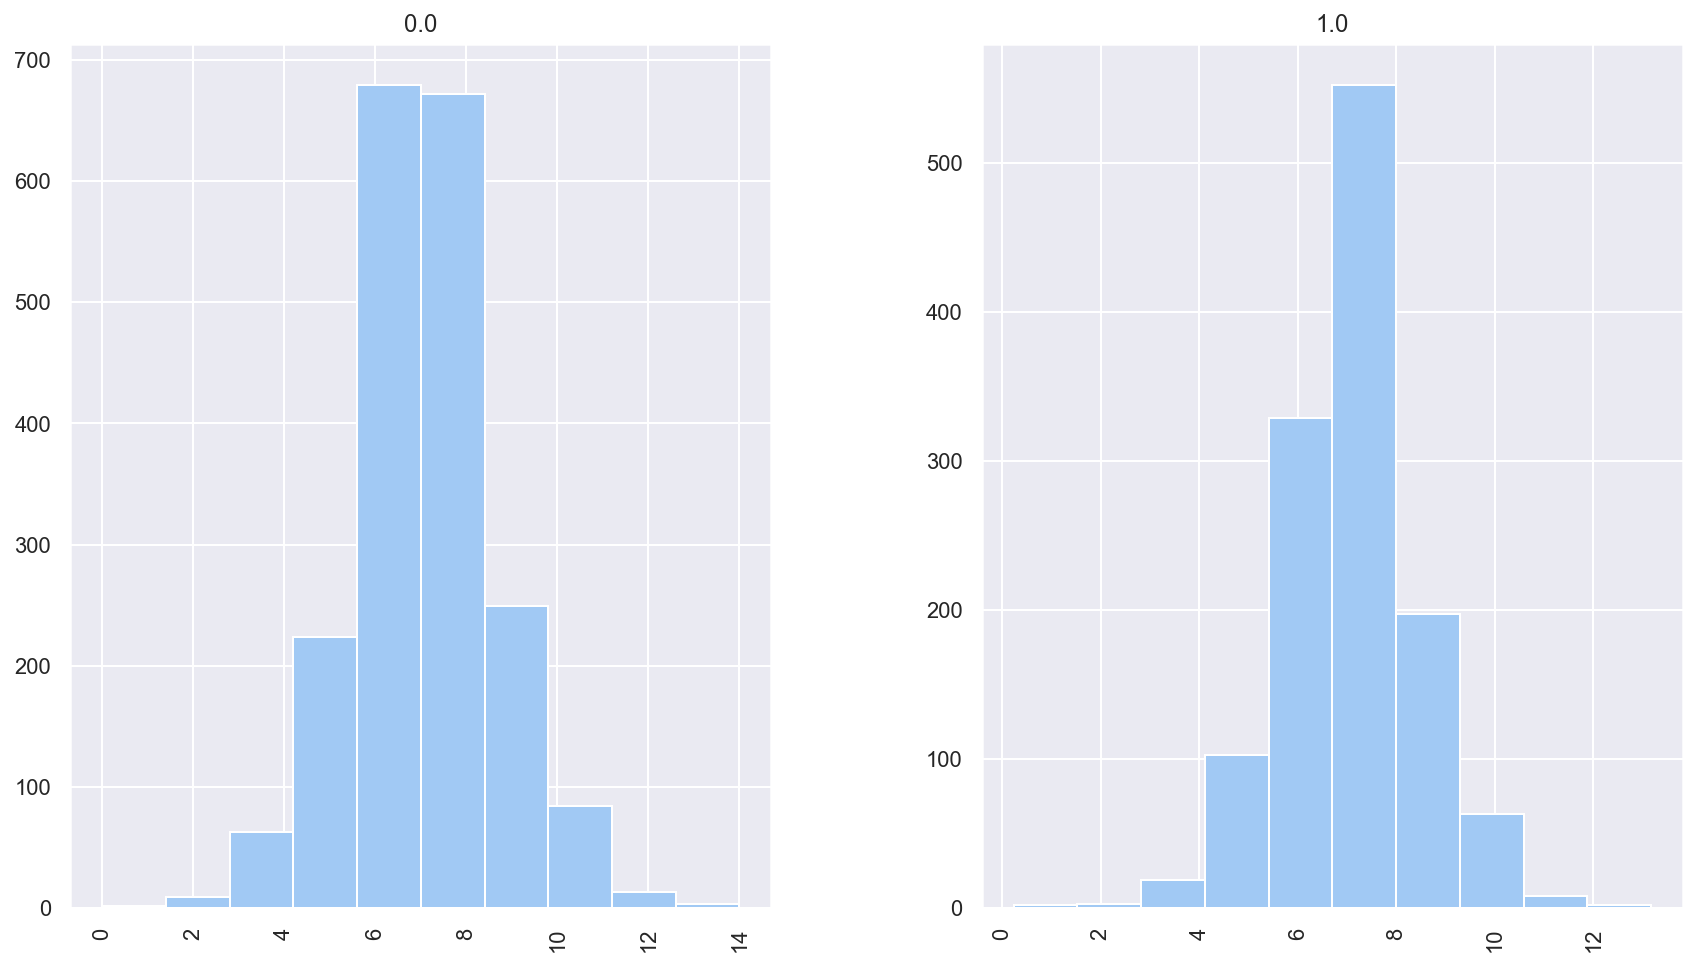

In [384]:
df2.hist(column='ph', by='Potability')

In [386]:
limit=pd.DataFrame(data=[min_val, max_val], columns=cols)
from matplotlib.patches import Rectangle
int_cols = df2.select_dtypes(exclude=['category']).columns.to_list()
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.kdeplot(data=df2, x=i, hue='Potability', ax=ax[x], fill=True, multiple='stack', alpha=0.5, linewidth=2)
    l,k = limit.iloc[:,x]
    ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)

NameError: name 'min_val' is not defined